### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [5]:
# Load the CSV file(s) as reviews.
tr = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
tr.head()

FileNotFoundError: [Errno 2] No such file or directory: 'turtle_reviews.csv'

In [8]:
# Any missing values?
tr.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [9]:
tr.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [10]:
# Explore the data.
# Check the column headers
tr.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')

In [1]:
# Check the number of rows and columns
tr.shape

NameError: name 'tr' is not defined

In [12]:
# Check the values of categorical columns
# Check genders
tr['gender'].value_counts()

gender
Female    1120
Male       880
Name: count, dtype: int64

In [13]:
# Check education types
tr['education'].value_counts()

education
graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: count, dtype: int64

In [14]:
# Check languages
tr['language'].value_counts()

language
EN    2000
Name: count, dtype: int64

In [15]:
# Check platform
tr['platform'].value_counts()

platform
Web    2000
Name: count, dtype: int64

In [16]:
# check product
tr['product'].value_counts()

product
1012    13
1031    13
979     12
977     11
3498    10
        ..
1459     9
263      9
466      8
254      8
453      8
Name: count, Length: 200, dtype: int64

In [17]:
# Basic descriptive statistics.
# Check age
tr['age'].describe()

count    2000.000000
mean       39.495000
std        13.573212
min        17.000000
25%        29.000000
50%        38.000000
75%        49.000000
max        72.000000
Name: age, dtype: float64

In [18]:
# Check remuneration
tr['remuneration (k£)'].describe()

count    2000.000000
mean       48.079060
std        23.123984
min        12.300000
25%        30.340000
50%        47.150000
75%        63.960000
max       112.340000
Name: remuneration (k£), dtype: float64

In [19]:
# Check spending score
tr['spending_score (1-100)'].describe()

count    2000.000000
mean       50.000000
std        26.094702
min         1.000000
25%        32.000000
50%        50.000000
75%        73.000000
max        99.000000
Name: spending_score (1-100), dtype: float64

In [20]:
# Check loyatly points
tr['loyalty_points'].describe()

count    2000.000000
mean     1578.032000
std      1283.239705
min        25.000000
25%       772.000000
50%      1276.000000
75%      1751.250000
max      6847.000000
Name: loyalty_points, dtype: float64

## 2. Drop columns

In [22]:
# Drop unnecessary columns.
tr_clean = tr.drop(columns=['language', 'platform'])

# View column names.
tr_clean.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [24]:
# Rename the column headers.
tr_clean = tr_clean.rename(columns={'remuneration (k£)':'pay', 'spending_score (1-100)':'spending_score'})

# View column names.
tr_clean.columns

Index(['gender', 'age', 'pay', 'spending_score', 'loyalty_points', 'education',
       'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [26]:
# Create a CSV file as output.
tr_clean.to_csv('tr_clean.csv', index=False)

In [27]:
# Import new CSV file with Pandas.
trc = pd.read_csv('tr_clean.csv')

# View DataFrame.
trc.head()

gender  age    pay  spending_score  loyalty_points education  product  \
0    Male   18  12.30              39             210  graduate      453   
1    Male   23  12.30              81             524  graduate      466   
2  Female   22  13.12               6              40  graduate      254   
3  Female   25  13.12              77             562  graduate      263   
4  Female   33  13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 5. Linear regression

### 5a) spending vs loyalty

In [30]:
# Import the necessary package
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

# Define independent variable and add constant
x = trc['spending_score']
x_constant = sm.add_constant(x)

# Define dependent variable.
y = trc['loyalty_points']

# Create model 
model = sm.OLS(y, x_constant).fit()

# Print summary of metrics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.92e-263
Time:                        21:31:23   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.0527     45.931     -1.

In [31]:
# Extract the predicted values.
py = model.predict(x_constant)

print(py)

0       1214.353374
1       2602.944491
2        123.317497
3       2470.697718
4       1247.415067
           ...     
1995    2206.204172
1996     189.440883
1997    2933.561424
1998     453.934429
1999     189.440883
Length: 2000, dtype: float64


In [32]:
# Extract the coefficients and intercept
intercept = model.params['const']
x_coefficient = model.params['spending_score']

# Create table easily showing Coefficient for intercept and spending score
regression_table = pd.DataFrame({
    'Variable': ['Intercept', 'spending_score'],
    'Coefficient': [intercept, x_coefficient]
})

print(regression_table)



         Variable  Coefficient
0       Intercept   -75.052663
1  spending_score    33.061693


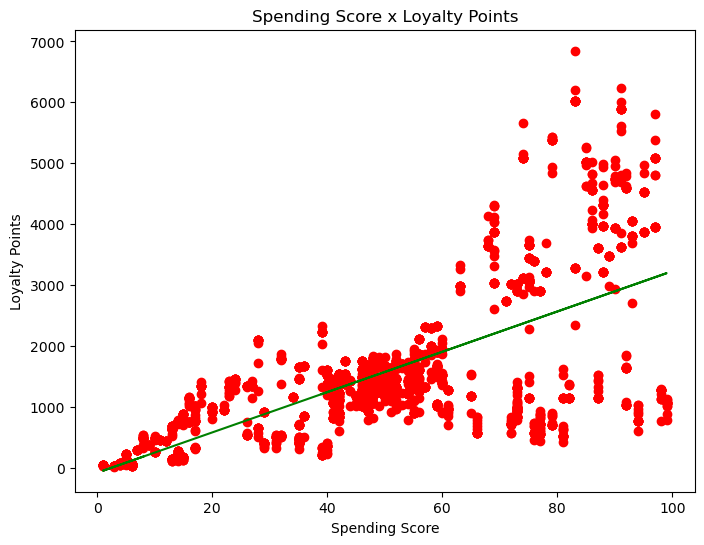

In [33]:
# Plot the graph with a regression line.
# Set plot area
plt.figure(figsize=(8, 6))

# Plot actual figures on scatterplot
plt.scatter(x, y, color='red')
#Plot regression line where py = predicted values
plt.plot(x, py, color='green')

# Set the title and legends for the graph.  
plt.title("Spending Score x Loyalty Points")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points") 

# Print the graph. 
plt.show()

In [34]:
plt.savefig("my_plot.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

### 5b) renumeration vs loyalty

In [36]:
# Define independent variable and add constant
x = trc['pay']
x_constant = sm.add_constant(x)

# Define dependent variable.
y = trc['loyalty_points']

# Create model 
model = sm.OLS(y, x_constant).fit()

# Print summary of metrics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.43e-209
Time:                        21:31:23   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -65.6865     52.171     -1.259      0.2

In [37]:
# Extract the predicted values.
py = model.predict(x_constant)

print(py)

0        354.823741
1        354.823741
2        382.857758
3        382.857758
4        410.891774
           ...     
1995    2821.817228
1996    3102.157397
1997    3102.157397
1998    3298.395515
1999    3102.157397
Length: 2000, dtype: float64


In [38]:
# Extract the coefficients and intercept
intercept = model.params['const']
x_coefficient = model.params['pay']

# Create table easily showing Coefficient for intercept and pay
regression_table = pd.DataFrame({
    'Variable': ['Intercept', 'pay'],
    'Coefficient': [intercept, x_coefficient]
})

print(regression_table)


    Variable  Coefficient
0  Intercept   -65.686513
1        pay    34.187825


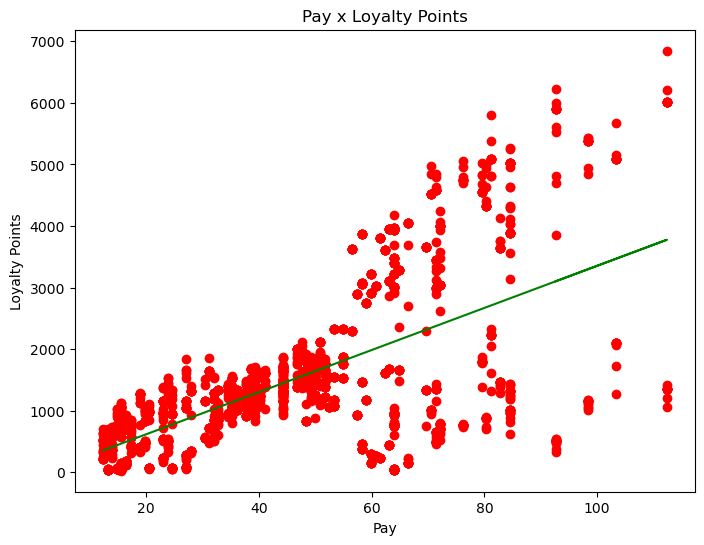

In [39]:
# Plot the graph with a regression line.
# Set plot area
plt.figure(figsize=(8, 6))

# Plot actual figures on scatterplot
plt.scatter(x, y, color='red')
#Plot regression line where py = predicted values
plt.plot(x, py, color='green')

# Set the title and legends for the graph.  
plt.title("Pay x Loyalty Points")
plt.xlabel("Pay")
plt.ylabel("Loyalty Points") 

# Print the graph. 
plt.show()

### 5c) age vs loyalty

In [41]:
# Define independent variable and add constant
x = trc['age']
x_constant = sm.add_constant(x)

# Define dependent variable.
y = trc['loyalty_points']

# Create model 
model = sm.OLS(y, x_constant).fit()

# Print summary of metrics
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 12 Apr 2025   Prob (F-statistic):             0.0577
Time:                        21:31:23   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

In [42]:
# Extract the predicted values.
py = model.predict(x_constant)

print(py)


0       1664.287247
1       1644.223221
2       1648.236026
3       1636.197611
4       1604.095169
           ...     
1995    1588.043949
1996    1563.967118
1997    1600.082364
1998    1600.082364
1999    1608.107975
Length: 2000, dtype: float64


In [43]:
# Extract the coefficients and intercept
intercept = model.params['const']
x_coefficient = model.params['age']

# Create table easily showing Coefficient for intercept and pay
regression_table = pd.DataFrame({
    'Variable': ['Intercept', 'age'],
    'Coefficient': [intercept, x_coefficient]
})

print(regression_table)


    Variable  Coefficient
0  Intercept  1736.517739
1        age    -4.012805


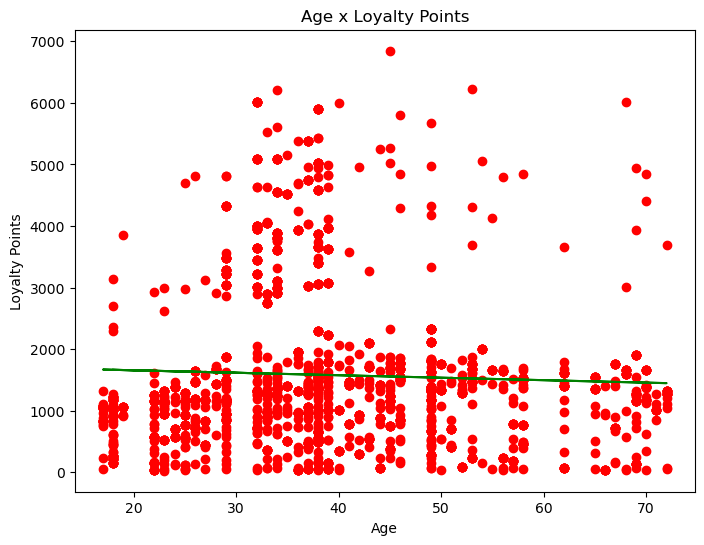

In [44]:
# Plot the graph with a regression line.
# Set plot area
plt.figure(figsize=(8, 6))

# Plot actual figures on scatterplot
plt.scatter(x, y, color='red')
#Plot regression line where py = predicted values
plt.plot(x, py, color='green')

# Set the title and legends for the graph.  
plt.title("Age x Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty Points") 

# Print the graph. 
plt.show()

### 5d) Run multiple regression on Spending Score + Pay vs Loyalty Points

In [46]:
# Define independent variable and add constant
X = trc[['spending_score', 'pay']]
X_constant = sm.add_constant(X)

# Define dependent variable.
y = trc['loyalty_points']

# Run model
model = sm.OLS(y, X_constant).fit()

In [47]:
# Print results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     4770.
Date:                Sat, 12 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:31:23   Log-Likelihood:                -15398.
No. Observations:                2000   AIC:                         3.080e+04
Df Residuals:                    1997   BIC:                         3.082e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1700.3051     35.740    -47.

## 6. Observations and insights

***Your observations here...***






#### Linear Regressions
Spending Score x Loyalty Points : A simple linear regression model can relatively accurately predict the relationship between Spending Score and Loyalty points upto a spending Score of 60. After that, it appears the relationship becomes less linear, where this model has limitations. 
- Coefficient: For every 1 unit increase in spending score, loyalty points increase by 33 on average.
- R-squared: Spending Score explains 45% of the variations in Loyalty Points

Pay x Loyalty Points has a similar relationship as Spending Score x Loyalty Points, but this time at around a Pay of 50 that the relationship becomes less linear
- Coefficient: For every unit increase in pay, loyalty points increase by 34 on average
- R-squared: Pay explains 38% of the variations in Loyalty Points

Age x Loyalty Points appears to no have no meaningful relationship.

#### Multiple Regression
Spending Score + Pay x Loyalty Points: Combining Spending Score and Pay as variables explains 83% of variations in Loyalty Points
- For every unit increase in spending_score, loyalty_points increase by 19 (holding pay constant) 
- For every unit increase in pay, loyalty_points increase by 17 (holding spending_score constant)


# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## 1. Load and prepare the data

In [53]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import math
import warnings
import matplotlib.pyplot as plt

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [54]:
# Create your new DataFrame
tr_clean_2 = pd.read_csv('tr_clean.csv')

# View the DataFrame.
print(tr_clean_2.info())
tr_clean_2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   pay             2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


gender  age    pay  spending_score  loyalty_points education  product  \
0    Male   18  12.30              39             210  graduate      453   
1    Male   23  12.30              81             524  graduate      466   
2  Female   22  13.12               6              40  graduate      254   
3  Female   25  13.12              77             562  graduate      263   
4  Female   33  13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [55]:
# Convert relevant columns into a readable format for decision tree
# Use one-hot encode to convert gender
trc2_encoded = pd.get_dummies(tr_clean_2, columns=['gender'], drop_first=True)

trc2_encoded.head()

age    pay  spending_score  loyalty_points education  product  \
0   18  12.30              39             210  graduate      453   
1   23  12.30              81             524  graduate      466   
2   22  13.12               6              40  graduate      254   
3   25  13.12              77             562  graduate      263   
4   33  13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  gender_Male  
0  The fact that 50% of this space is wasted on a...         True  
1  Another worthless Dungeon Master's screen from...         True  
2                    pretty, but also pretty useless        False  
3                                         Five Stars        False  
4                                         Money trap        False

In [56]:
# Use ordinal encoding to transform education
# Re-check education values
tr['education'].value_counts()

education
graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: count, dtype: int64

In [57]:
# Import Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

# Define education order
education_order = ['Basic', 'diploma', 'graduate', 'postgraduate', 'PhD']

# Use Ordinal encoding to tranform into ordered numeric values
ordinal_encoder = OrdinalEncoder(categories=[education_order])

# Transform the education column
trc2_encoded['education'] = ordinal_encoder.fit_transform(trc2_encoded[['education']])

trc2_encoded.head()

age    pay  spending_score  loyalty_points  education  product  \
0   18  12.30              39             210        2.0      453   
1   23  12.30              81             524        2.0      466   
2   22  13.12               6              40        2.0      254   
3   25  13.12              77             562        2.0      263   
4   33  13.94              40             366        2.0      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  gender_Male  
0  The fact that 50% of this space is wasted on a...         True  
1  Another worthless Dungeon Master's screen from...         True  
2                    pretty, but also pretty useless        False  
3                                         Five Stars        False  
4                                         Money trap        False

In [58]:
# Check why education showing with decimal place
trc2_encoded.dtypes

age                 int64
pay               float64
spending_score      int64
loyalty_points      int64
education         float64
product             int64
review             object
summary            object
gender_Male          bool
dtype: object

In [59]:
# Convert education to integer
trc2_encoded['education'] = trc2_encoded['education'].astype(int)

trc2_encoded.head()

age    pay  spending_score  loyalty_points  education  product  \
0   18  12.30              39             210          2      453   
1   23  12.30              81             524          2      466   
2   22  13.12               6              40          2      254   
3   25  13.12              77             562          2      263   
4   33  13.94              40             366          2      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  gender_Male  
0  The fact that 50% of this space is wasted on a...         True  
1  Another worthless Dungeon Master's screen from...         True  
2                    pretty, but also pretty useless        False  
3                                         Five Stars        False  
4                                         Money trap        False

In [60]:
# Convert gender_Male to integer
trc2_encoded['gender_Male'] = trc2_encoded['gender_Male'].astype(int)

trc2_encoded.head()

age    pay  spending_score  loyalty_points  education  product  \
0   18  12.30              39             210          2      453   
1   23  12.30              81             524          2      466   
2   22  13.12               6              40          2      254   
3   25  13.12              77             562          2      263   
4   33  13.94              40             366          2      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  gender_Male  
0  The fact that 50% of this space is wasted on a...            1  
1  Another worthless Dungeon Master's screen from...            1  
2                    pretty, but also pretty useless            0  
3                                         Five Stars            0  
4                                         Money trap            0

In [61]:
# Drop non-numeric columns
trc2_encoded = trc2_encoded.drop(columns=['review', 'summary'])

trc2_encoded.head()

age    pay  spending_score  loyalty_points  education  product  gender_Male
0   18  12.30              39             210          2      453            1
1   23  12.30              81             524          2      466            1
2   22  13.12               6              40          2      254            0
3   25  13.12              77             562          2      263            0
4   33  13.94              40             366          2      291            0

In [62]:
# Specify that the column loyalty_points
# should be moved into a separate DataFrame.
cols = trc2_encoded.columns[trc2_encoded.columns != 'loyalty_points']

# Specify 'X' as the independent variables 
# and 'y' as the dependent variable.
X = trc2_encoded[cols]
y = trc2_encoded['loyalty_points']

In [63]:
# Review X and Y.
X.head()

age    pay  spending_score  education  product  gender_Male
0   18  12.30              39          2      453            1
1   23  12.30              81          2      466            1
2   22  13.12               6          2      254            0
3   25  13.12              77          2      263            0
4   33  13.94              40          2      291            0

In [64]:
y.head()

0    210
1    524
2     40
3    562
4    366
Name: loyalty_points, dtype: int64

## 2. Create train and test data sets.

In [66]:
# Split the data training and testing 30/70.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

## 3. Create Decision tree regressor

In [68]:
# Create your decision tree regressor.
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the data set.
regressor.fit(X_train,y_train)  

DecisionTreeRegressor(random_state=42)

In [69]:
# Predict the response for the data test.
y_predict = regressor.predict(X_test)  

In [70]:
# Show some prediction results
y_predict[:5]

array([  65., 3398., 2750., 1122., 1622.])

In [71]:
# Evaluate the model.
# Calculate and print the MAE and MSE
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predict))
# Calculate and print the RMSE.
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict)))  

Mean Absolute Error:  38.085
Mean Squared Error:  10031.145
Root Mean Squared Error:  100.15560393707383


In [72]:
# Check feature importance
feature_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': regressor.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importance)

          Feature  Importance
1             pay    0.497461
2  spending_score    0.483538
0             age    0.016813
3       education    0.001403
4         product    0.000624
5     gender_Male    0.000161


##### Looks like pay and spending_score are the features that hold the most importance, by some distance. Therefore I will remove other features to prune the model.

In [74]:
# Remove features with little importance 
# Remove age, education, product and gender
important_features = ["pay", "spending_score"]
X_train_pruned = X_train[important_features]
X_test_pruned = X_test[important_features]

# Retrain the model
regressor.fit(X_train_pruned, y_train)

# Predict and evaluate again
y_predict_pruned = regressor.predict(X_test_pruned)


In [75]:
# Re-evaluate the model to check if improved
# Calculate and print the MAE and MSE
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predict_pruned))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predict_pruned))
# Calculate and print the RMSE.
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict_pruned)))  

Mean Absolute Error:  83.27339035039036
Mean Squared Error:  26097.98366433656
Root Mean Squared Error:  161.54870369129105


##### Looks like the model has got worse after removing what initially looked like unimportant features. I will look at max_depth to see if its an issue with overfitting. 

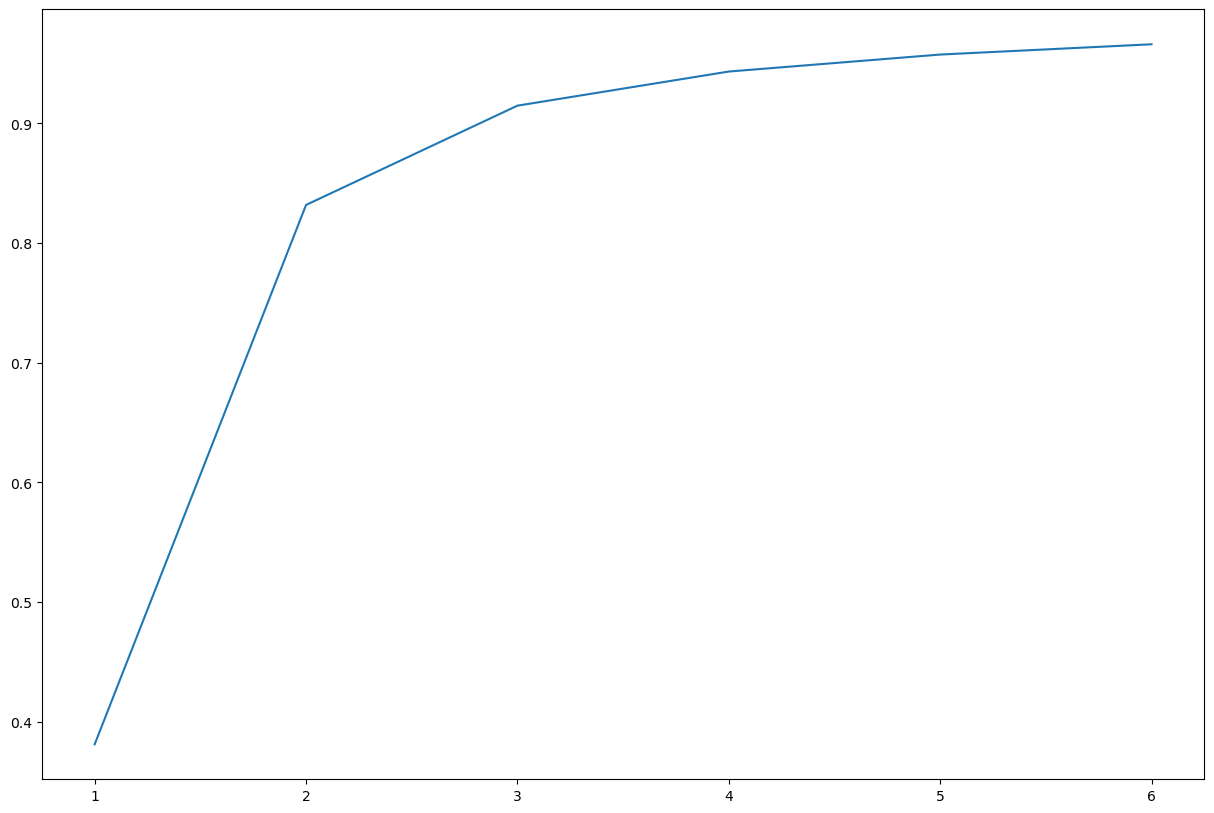

In [77]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 7))
# List to store the r squared value for each value of max_depth:
r_squared = []
for depth in max_depth_range:
    
    dtreg = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    dtreg.fit(X_train_pruned, y_train)
    r_squared.append(dtreg.score(X_test_pruned, y_test))

# Plot R-squared values across the range of depth values evaluated
plt.plot(max_depth_range, r_squared)
plt.show()

##### It looks like max_depth of 6 is only possible and this is also optimal with the current model. This is likely because there is only 2 features. Therefore, given the model was performing better before removing the 'unimportant' features, I will now add back in a feature at a time to check if it improves the performance. I will add these features back in the order of importance.

In [79]:
# Add age back into the model as the most important feature previously removed
important_features_2 = ["pay", "spending_score", "age"]
X_train_pruned_2 = X_train[important_features_2]
X_test_pruned_2 = X_test[important_features_2]

# Retrain the model
regressor.fit(X_train_pruned_2, y_train)

# Predict and evaluate again
y_predict_pruned_2 = regressor.predict(X_test_pruned_2)

In [80]:
# Evaluate model performance
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predict_pruned_2))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predict_pruned_2))
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict_pruned_2)))

Mean Absolute Error:  26.171666666666667
Mean Squared Error:  6390.448333333334
Root Mean Squared Error:  79.94027979268857


##### Adding age back in has improved the model beyond the original model (with all features included). I will now add back in education as the next most important feature

In [82]:
# Add education back into the model as the next most important feature previously removed
important_features_3 = ["pay", "spending_score", "age", "education"]
X_train_pruned_3 = X_train[important_features_3]
X_test_pruned_3 = X_test[important_features_3]

# Retrain the model
regressor.fit(X_train_pruned_3, y_train)

# Predict and evaluate again
y_predict_pruned_3 = regressor.predict(X_test_pruned_3)

In [83]:
# Evaluate model performance
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predict_pruned_3))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predict_pruned_3))
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict_pruned_3)))

Mean Absolute Error:  33.00666666666667
Mean Squared Error:  8514.513333333334
Root Mean Squared Error:  92.27412060449741


##### Adding edcucation back has reduced the performance of the model. Given the very low importance of gender and product, I will continue on the basis that the optimal model includes pay, spending score and age. I will now check the optimal max_depth

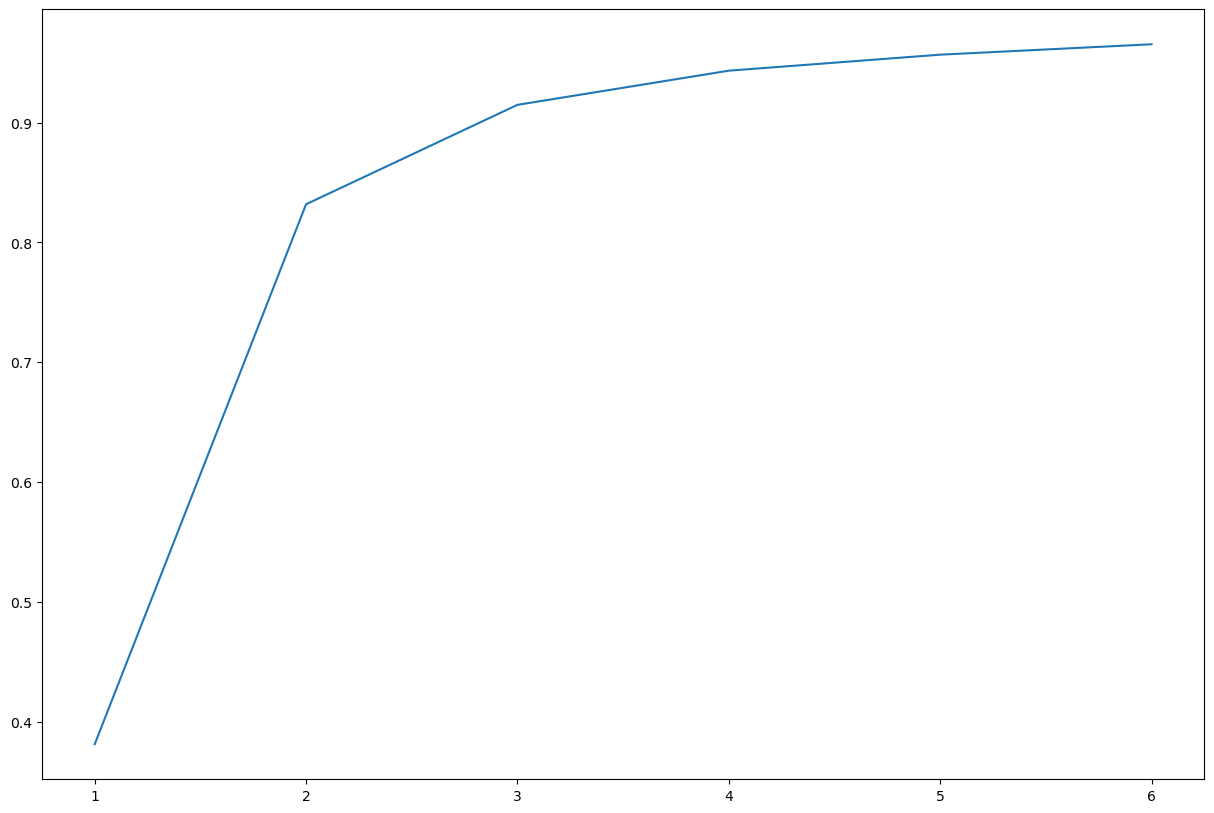

In [85]:
# Using model including age, spending_score and pay (X_train_pruned_2)
# List of values to try for max_depth
max_depth_range = list(range(1, 7))
# List to store the r squared value for each value of max_depth
r_squared = []
for depth in max_depth_range:
    
    dtreg = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    dtreg.fit(X_train_pruned_2, y_train)
    r_squared.append(dtreg.score(X_test_pruned_2, y_test))

# Plot R-squared values across the range of depth values evaluated
plt.plot(max_depth_range, r_squared)
plt.show()

##### It looks like 6 is both the maximum number and optimal depth. Given the Mean Absolute Error (26) is significantly lower than the Root Mean Squared Error (80), it implies there is a few significant outliers in the data impacted performance. Therefore I will remove these and retrain the model

In [87]:
# Using the interquartile range to remove outliers in each independent variable
# Calculate 25th percentile and 75th percentile
Q1 = X_train_pruned_2.quantile(0.25)
Q3 = X_train_pruned_2.quantile(0.75)

# Calculate interquartile range
IQR = Q3 - Q1

# Define the upper and lower quartiles
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
X_train_pruned_2_flt = X_train_pruned_2[~((X_train_pruned_2 < lower_bound) | (X_train_pruned_2 > upper_bound)).any(axis=1)]
y_train_flt = y_train[X_train_pruned_2_flt.index]

# Filter the test data 
X_test_pruned_2_flt = X_test_pruned_2[~((X_test_pruned_2 < lower_bound) | (X_test_pruned_2 > upper_bound)).any(axis=1)]

# Align y_test with the filtered test data by using the index from the pruned data
y_test_flt = y_test[X_test_pruned_2_flt.index]

# Retrain the model using the filtered data
regressor.fit(X_train_pruned_2_flt, y_train_flt)

# Run the prediction on the filtered data
y_predict_flt = regressor.predict(X_test_pruned_2_flt)

# Evaluate performance
print("Mean Absolute Error (after removing outliers): ", metrics.mean_absolute_error(y_test[X_test_pruned_2_flt.index], y_predict_flt))
print("Mean Squared Error (after removing outliers): ", metrics.mean_squared_error(y_test[X_test_pruned_2_flt.index], y_predict_flt))
print("Root Mean Squared Error (after removing outliers): ", math.sqrt(metrics.mean_squared_error(y_test[X_test_pruned_2_flt.index], y_predict_flt)))

Mean Absolute Error (after removing outliers):  26.171666666666667
Mean Squared Error (after removing outliers):  6390.448333333334
Root Mean Squared Error (after removing outliers):  79.94027979268857


##### Looks like the performance is identical to the previous model, meaning either no outliers were removed or if they were, they had no effect on the end result. I will check visually via a boxplot to see if there are outliers in the independent variables

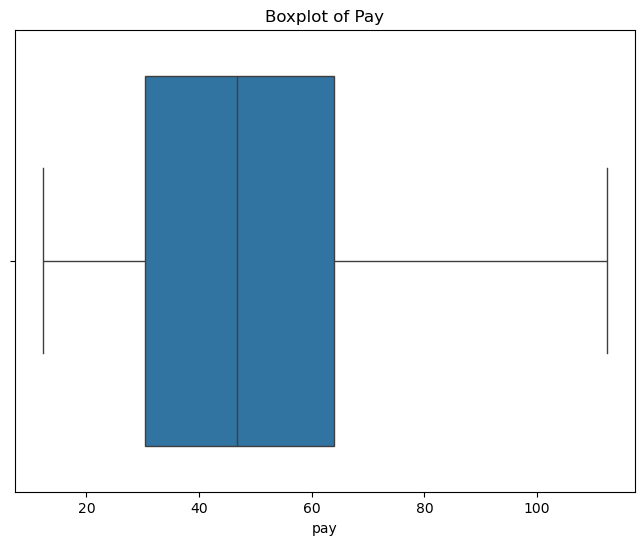

In [89]:
# Create a boxplot for pay
plt.figure(figsize=(8, 6))
sns.boxplot(x=X_train_pruned_2['pay'])
plt.title('Boxplot of Pay')
plt.show()

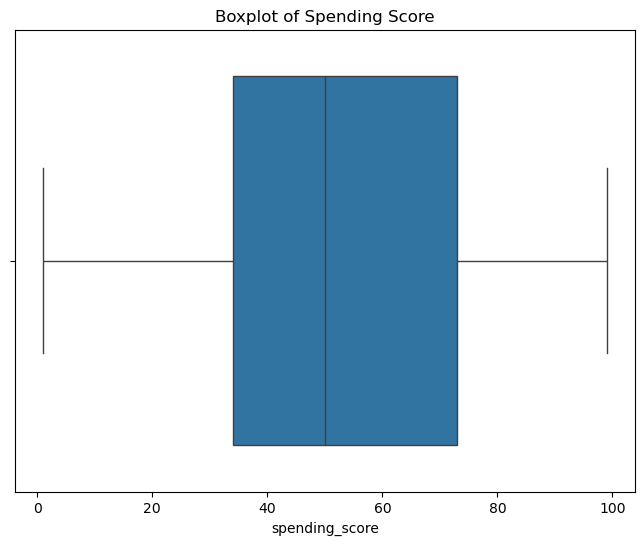

In [90]:
# Create a boxplot for spending score
plt.figure(figsize=(8, 6))
sns.boxplot(x=X_train_pruned_2['spending_score']) 
plt.title('Boxplot of Spending Score')
plt.show()

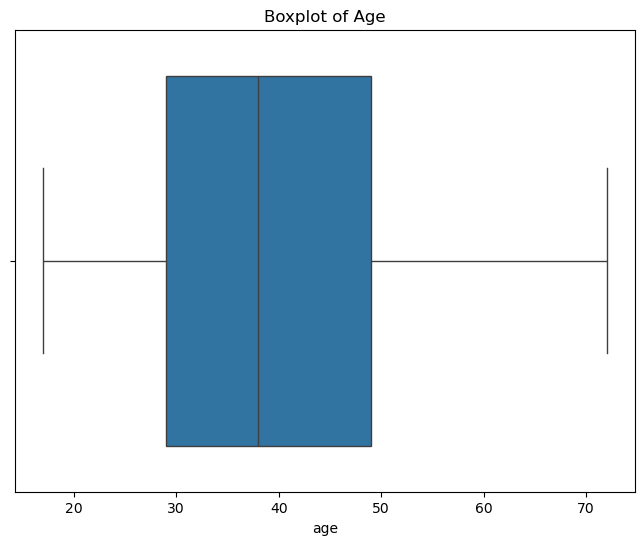

In [91]:
# Create a boxplot for age
plt.figure(figsize=(8, 6))
sns.boxplot(x=X_train_pruned_2['age']) 
plt.title('Boxplot of Age')
plt.show()

##### From the above, it looks like there are no outliers in these variables. Therefore, I will look for outliers in the dependent variable

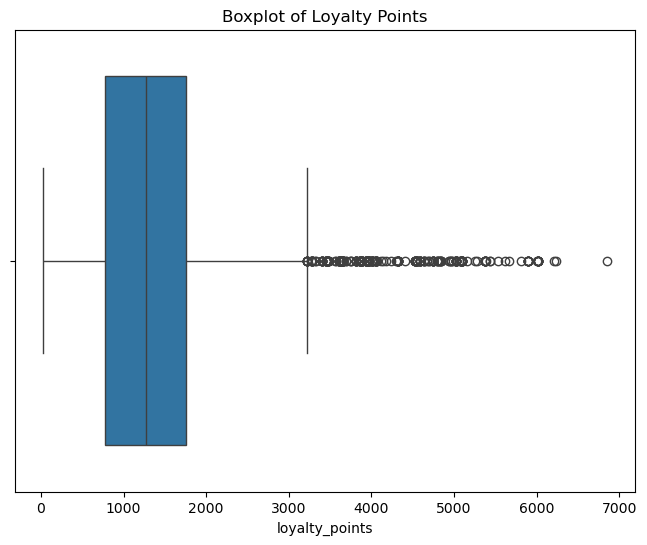

In [93]:
# Create a boxplot for loyalty points
plt.figure(figsize=(8, 6))
sns.boxplot(x=tr_clean_2['loyalty_points']) 
plt.title('Boxplot of Loyalty Points')
plt.show()

##### Looks like there are significant number of outliers in number of loyalty points. I will remove these and rerun the model to see if there is an impact on accuracy

In [95]:
# Using the interquartile range to remove outliers in loyalaty points
# Calculate 25th percentile and 75th percentile
Q1 = tr_clean_2['loyalty_points'].quantile(0.25)
Q3 = tr_clean_2['loyalty_points'].quantile(0.75)

# Calculate interquartile range
IQR = Q3 - Q1

# Define the upper and lower quartiles
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Remove outliers
tr_clean_3 = tr_clean_2[(tr_clean_2['loyalty_points'] >= lower_bound) & 
                         (tr_clean_2['loyalty_points'] <= upper_bound)]

# Display cleaned dataset
tr_clean_3.head()

gender  age    pay  spending_score  loyalty_points education  product  \
0    Male   18  12.30              39             210  graduate      453   
1    Male   23  12.30              81             524  graduate      466   
2  Female   22  13.12               6              40  graduate      254   
3  Female   25  13.12              77             562  graduate      263   
4  Female   33  13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [96]:
# Look at shape of new dataframe
tr_clean_3.shape

(1734, 9)

##### Original dataset was 2,000 rows, so 266 rows have been removed. I will now retrain the model with the new dataframe

In [98]:
# Convert relevant columns into a readable format for decision tree
# Use one-hot encode to convert gender
trc3_encoded = pd.get_dummies(tr_clean_3, columns=['gender'], drop_first=True)

trc3_encoded.head()

age    pay  spending_score  loyalty_points education  product  \
0   18  12.30              39             210  graduate      453   
1   23  12.30              81             524  graduate      466   
2   22  13.12               6              40  graduate      254   
3   25  13.12              77             562  graduate      263   
4   33  13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  gender_Male  
0  The fact that 50% of this space is wasted on a...         True  
1  Another worthless Dungeon Master's screen from...         True  
2                    pretty, but also pretty useless        False  
3                                         Five Stars        False  
4                                         Money trap        False

In [99]:
# Use Ordinal Encoding to transform education to readable format
# Define education order
education_order = ['Basic', 'diploma', 'graduate', 'postgraduate', 'PhD']

# Use Ordinal encoding to tranform into ordered numeric values
ordinal_encoder = OrdinalEncoder(categories=[education_order])

# Transform the education column
trc3_encoded['education'] = ordinal_encoder.fit_transform(trc3_encoded[['education']])

trc3_encoded.head()

age    pay  spending_score  loyalty_points  education  product  \
0   18  12.30              39             210        2.0      453   
1   23  12.30              81             524        2.0      466   
2   22  13.12               6              40        2.0      254   
3   25  13.12              77             562        2.0      263   
4   33  13.94              40             366        2.0      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  gender_Male  
0  The fact that 50% of this space is wasted on a...         True  
1  Another worthless Dungeon Master's screen from...         True  
2                    pretty, but also pretty useless        False  
3                                         Five Stars        False  
4                                         Money trap        False

In [100]:
# Convert education to integer
trc2_encoded['education'] = trc2_encoded['education'].astype(int)

trc2_encoded.head()

age    pay  spending_score  loyalty_points  education  product  gender_Male
0   18  12.30              39             210          2      453            1
1   23  12.30              81             524          2      466            1
2   22  13.12               6              40          2      254            0
3   25  13.12              77             562          2      263            0
4   33  13.94              40             366          2      291            0

In [101]:
# Convert gender_Male to integer
trc3_encoded['gender_Male'] = trc3_encoded['gender_Male'].astype(int)

trc3_encoded.head()

age    pay  spending_score  loyalty_points  education  product  \
0   18  12.30              39             210        2.0      453   
1   23  12.30              81             524        2.0      466   
2   22  13.12               6              40        2.0      254   
3   25  13.12              77             562        2.0      263   
4   33  13.94              40             366        2.0      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  gender_Male  
0  The fact that 50% of this space is wasted on a...            1  
1  Another worthless Dungeon Master's screen from...            1  
2                    pretty, but also pretty useless            0  
3                                         Five Stars            0  
4                                         Money trap            0

In [102]:
# Drop non-numeric columns

trc3_encoded = trc3_encoded.drop(columns=['review', 'summary'])

trc3_encoded.head()

age    pay  spending_score  loyalty_points  education  product  gender_Male
0   18  12.30              39             210        2.0      453            1
1   23  12.30              81             524        2.0      466            1
2   22  13.12               6              40        2.0      254            0
3   25  13.12              77             562        2.0      263            0
4   33  13.94              40             366        2.0      291            0

In [103]:
# Specify that the column loyalty_points
# should be moved into a separate DataFrame.
cols = trc3_encoded.columns[trc3_encoded.columns != 'loyalty_points']

# Specify 'X' as the independent variables 
# and 'y' as the dependent variable.
X = trc3_encoded[cols]
y = trc3_encoded['loyalty_points']

In [104]:
# Review X and Y.
X.head()

age    pay  spending_score  education  product  gender_Male
0   18  12.30              39        2.0      453            1
1   23  12.30              81        2.0      466            1
2   22  13.12               6        2.0      254            0
3   25  13.12              77        2.0      263            0
4   33  13.94              40        2.0      291            0

In [105]:
y.head()

0    210
1    524
2     40
3    562
4    366
Name: loyalty_points, dtype: int64

In [106]:
# Split the data training and testing 30/70.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [107]:
# Create your decision tree regressor.
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the data set.
regressor.fit(X_train,y_train)  

DecisionTreeRegressor(random_state=42)

In [108]:
# Predict the response for the data test.
y_predict = regressor.predict(X_test)  

In [109]:
# Evaluate the model.
# Calculate and print the MAE and MSE
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predict))
# Calculate and print the RMSE.
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict)))  

Mean Absolute Error:  24.491362763915546
Mean Squared Error:  7324.986564299425
Root Mean Squared Error:  85.58613535088159


##### By removing the dependent variable outliers, performance has already been improved even before pruning. Below is the original metrics with all independent varaibles included for comparison with above output:
###### Mean Absolute Error:  38.085
###### Mean Squared Error:  10031.145
###### Root Mean Squared Error:  100.15560393707383

In [111]:
# Keep only important features as per above
# Remove education, product and gender
important_features = ["pay", "spending_score", "age"]
X_train_pruned3 = X_train[important_features]
X_test_pruned3 = X_test[important_features]

# Retrain the model
regressor.fit(X_train_pruned3, y_train)

# Predict and evaluate again
y_predict_pruned3 = regressor.predict(X_test_pruned3)

In [112]:
# Evaluate model performance
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predict_pruned3))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predict_pruned3))
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict_pruned3)))

Mean Absolute Error:  18.280230326295584
Mean Squared Error:  5246.510556621881
Root Mean Squared Error:  72.43280028151528


##### The model has been improved through the removal of outliers in the dependent variables (i.e. loyalty points). Previously, the best model had these metrics for comparison with the above output:
###### Mean Absolute Error:  26.171666666666667
###### Mean Squared Error:  6390.448333333334
###### Root Mean Squared Error:  79.94027979268857

## 4. Fit and plot final model.

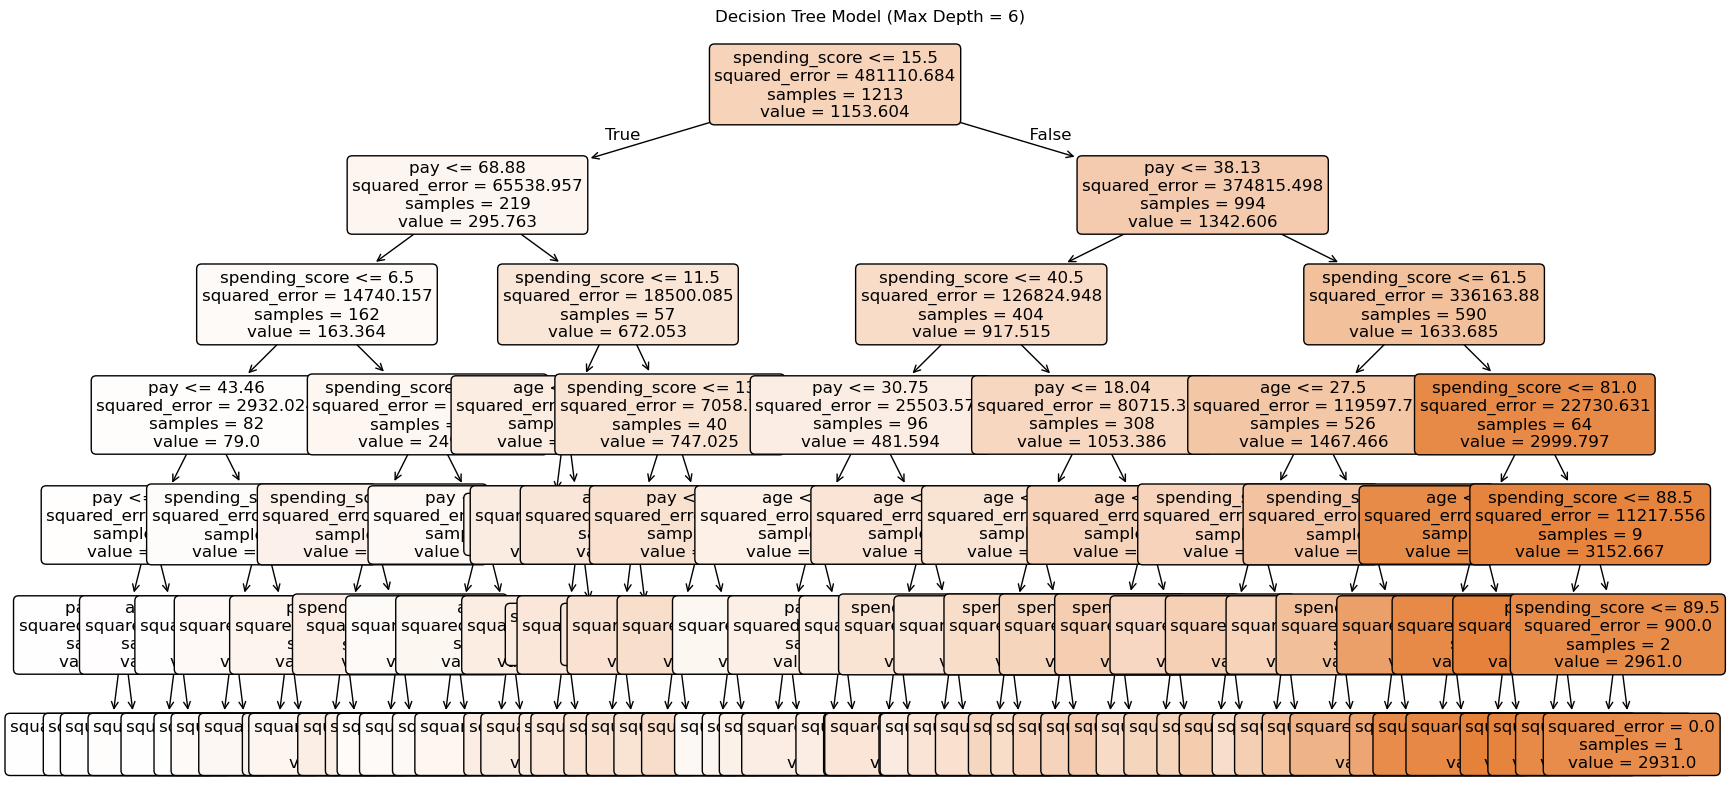

In [115]:
# Create and train the regressor with a limited depth
regressor_limited = DecisionTreeRegressor(max_depth=6)
regressor_limited.fit(X_train_pruned3, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(regressor_limited, filled=True, feature_names=important_features, rounded=True, fontsize=12)
plt.title("Decision Tree Model (Max Depth = 6)")
plt.show()

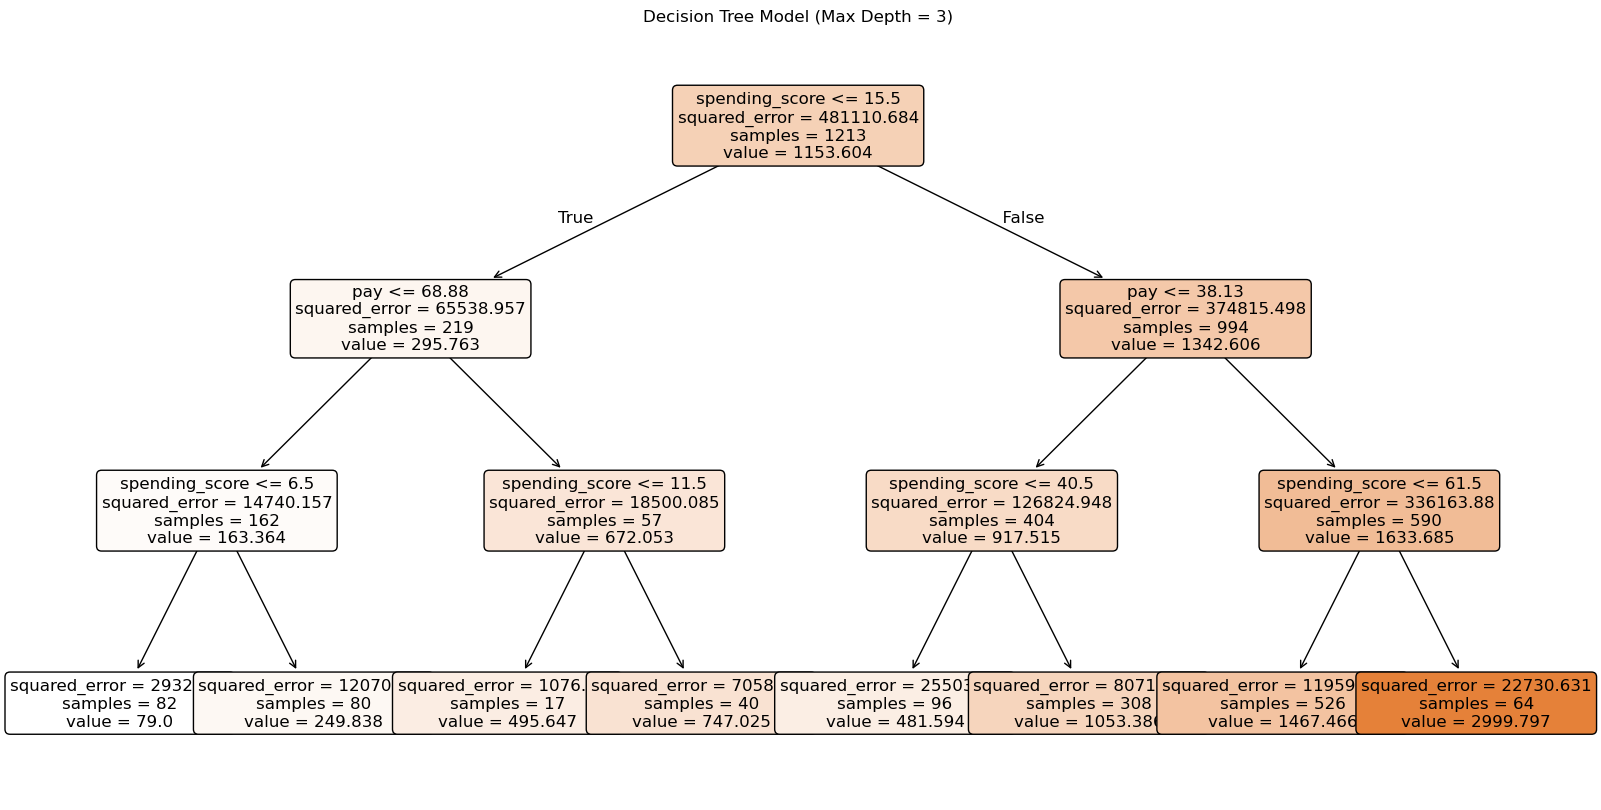

In [116]:
# Make chart more readable by adjusting the max depth
regressor_limited = DecisionTreeRegressor(max_depth=3)
regressor_limited.fit(X_train_pruned3, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10)) 
plot_tree(regressor_limited, filled=True, feature_names=important_features, rounded=True, fontsize=12)
plt.title("Decision Tree Model (Max Depth = 3)")
plt.show()

## 5. Discuss: Insights and observations

The most important features appear to be spending_score and pay. However, the model has been improved by also including age as a feature, even though initially it didn't appear an important feature. I further improved the model by removing outliers from the dependent variable, loyalty_points. 

I think this model is quite hard to explain to non-technical audiences. 

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [121]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [122]:
# Load the CSV file(s) as df2.
trc3 = pd.read_csv('tr_clean.csv')

# View DataFrame.
trc3.head()


gender  age    pay  spending_score  loyalty_points education  product  \
0    Male   18  12.30              39             210  graduate      453   
1    Male   23  12.30              81             524  graduate      466   
2  Female   22  13.12               6              40  graduate      254   
3  Female   25  13.12              77             562  graduate      263   
4  Female   33  13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [123]:
# Drop unnecessary columns.
pay_spend = trc3.drop(columns=['gender', 'age', 'education', 'product', 'review', 'summary'])

# View DataFrame.

pay_spend.head()

pay  spending_score  loyalty_points
0  12.30              39             210
1  12.30              81             524
2  13.12               6              40
3  13.12              77             562
4  13.94              40             366

In [124]:
# Create Low, Medium, High Categories for Loyalty Points
# Check loyalty_points range
pay_spend['loyalty_points'].describe()

count    2000.000000
mean     1578.032000
std      1283.239705
min        25.000000
25%       772.000000
50%      1276.000000
75%      1751.250000
max      6847.000000
Name: loyalty_points, dtype: float64

In [125]:
# Create Low, Medium, High Categories for Loyalty Points
# Define bins and labels for loyalty categories
bins = [0, 1000, 1600, float('inf')]
labels = ['Low', 'Medium', 'High'] 

# Apply segmentation
pay_spend['loyalty_category'] = pd.cut(pay_spend['loyalty_points'], bins=bins, labels=labels, right=True)

pay_spend.head()

pay  spending_score  loyalty_points loyalty_category
0  12.30              39             210              Low
1  12.30              81             524              Low
2  13.12               6              40              Low
3  13.12              77             562              Low
4  13.94              40             366              Low

In [126]:
# Check if categories are roughly evenly spread
pay_spend['loyalty_category'].value_counts()

loyalty_category
Low       686
Medium    675
High      639
Name: count, dtype: int64

In [127]:
# Explore the data.
pay_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   pay               2000 non-null   float64 
 1   spending_score    2000 non-null   int64   
 2   loyalty_points    2000 non-null   int64   
 3   loyalty_category  2000 non-null   category
dtypes: category(1), float64(1), int64(2)
memory usage: 49.1 KB


In [128]:
# Descriptive statistics.
pay_spend.describe()

pay  spending_score  loyalty_points
count  2000.000000     2000.000000     2000.000000
mean     48.079060       50.000000     1578.032000
std      23.123984       26.094702     1283.239705
min      12.300000        1.000000       25.000000
25%      30.340000       32.000000      772.000000
50%      47.150000       50.000000     1276.000000
75%      63.960000       73.000000     1751.250000
max     112.340000       99.000000     6847.000000

## 2. Plot

<Axes: xlabel='pay', ylabel='spending_score'>

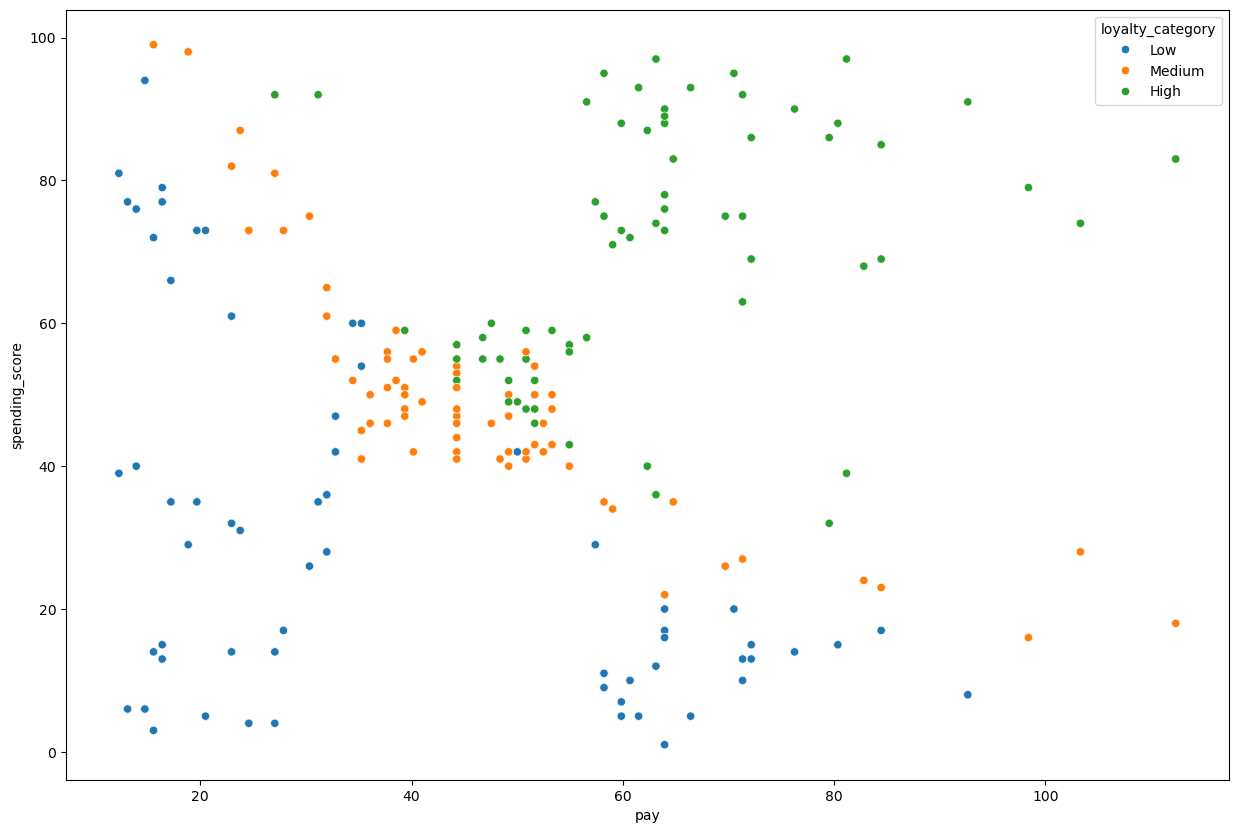

In [130]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='pay', y='spending_score', data=pay_spend, hue='loyalty_category')

##### There is a meaningful relationship between spending score and pay

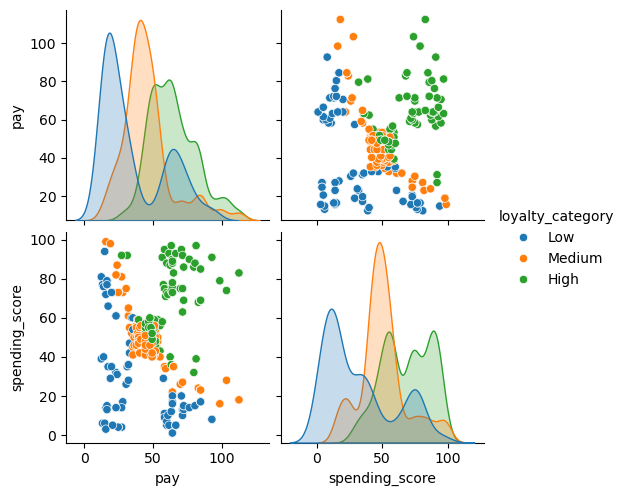

In [132]:
# Create a pairplot with Seaborn.
x = pay_spend[['pay', 'spending_score']]

sns.pairplot(pay_spend,
             vars=x,
             hue='loyalty_category')

## 3. Elbow and silhoutte methods

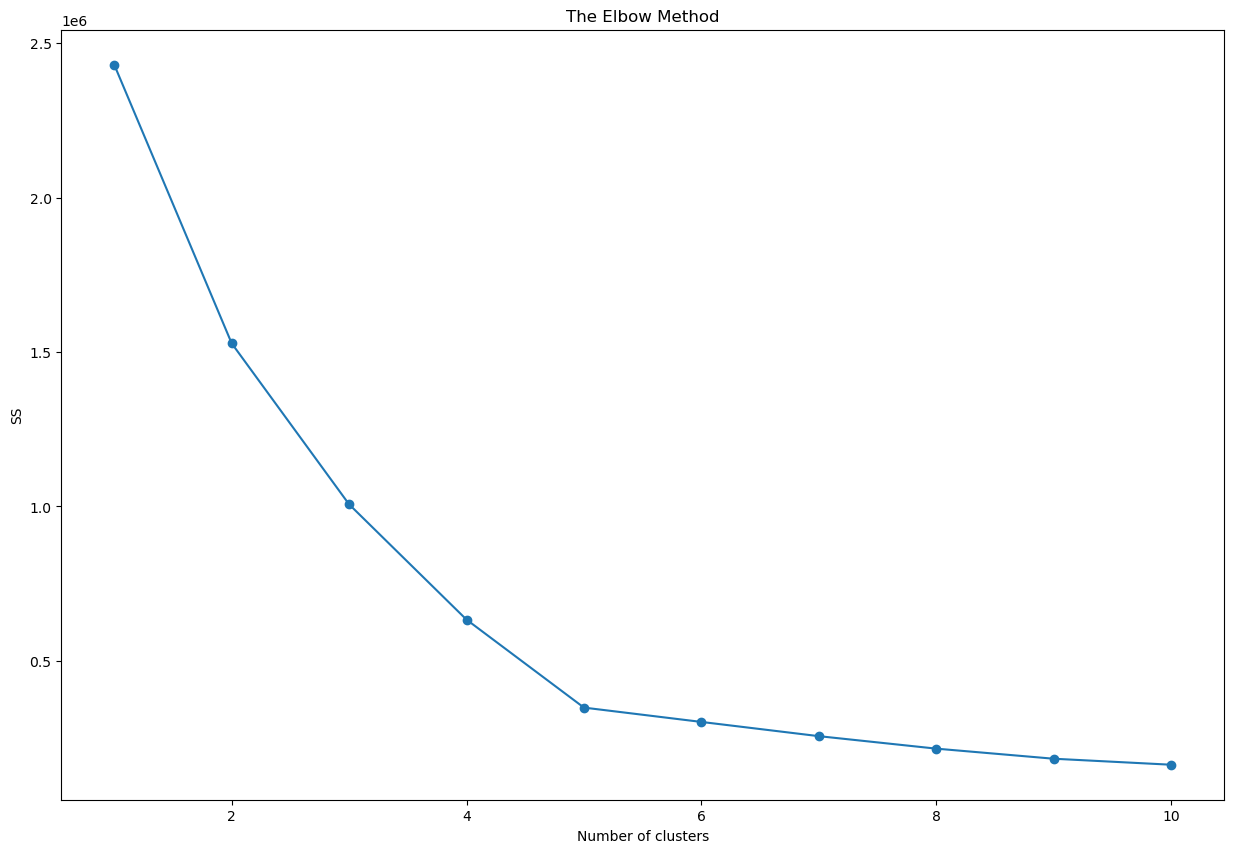

In [134]:
# Determine the number of clusters: Elbow method.
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

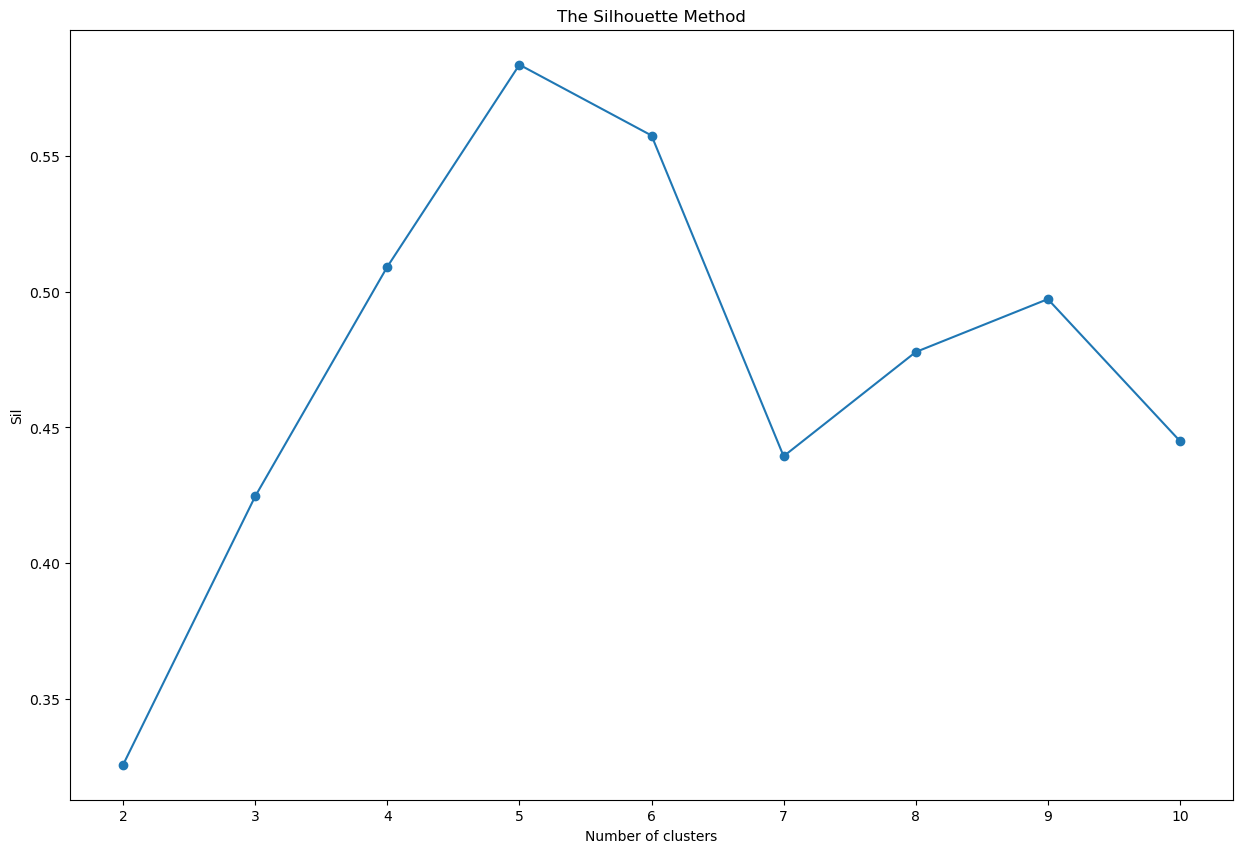

In [135]:
# Determine the number of clusters: Silhouette method.
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

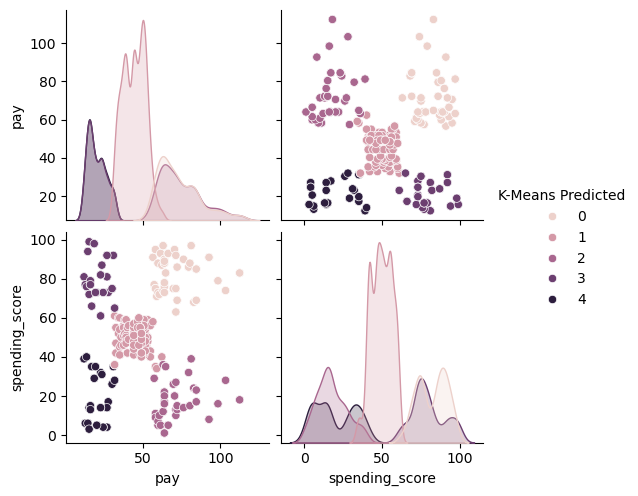

In [137]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

##### This model appears to make sense logically. It is clustering consumers into 5 groups which are easy to explain: 
- low pay & low spending score
- low pay & high spending score
- high pay & low spending score
- high pay & high spending score
- medium pay & medium spending score

In [139]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64

##### The clusters are quite varied in size, with a lot of consumers in the middle bucket. This leads me to experiment with more clusters to see if that would make the clusters more even

In [141]:
# View the K-Means predicted.
print(x.head())

     pay  spending_score  K-Means Predicted
0  12.30              39                  4
1  12.30              81                  3
2  13.12               6                  4
3  13.12              77                  3
4  13.94              40                  4


<Axes: xlabel='pay', ylabel='spending_score'>

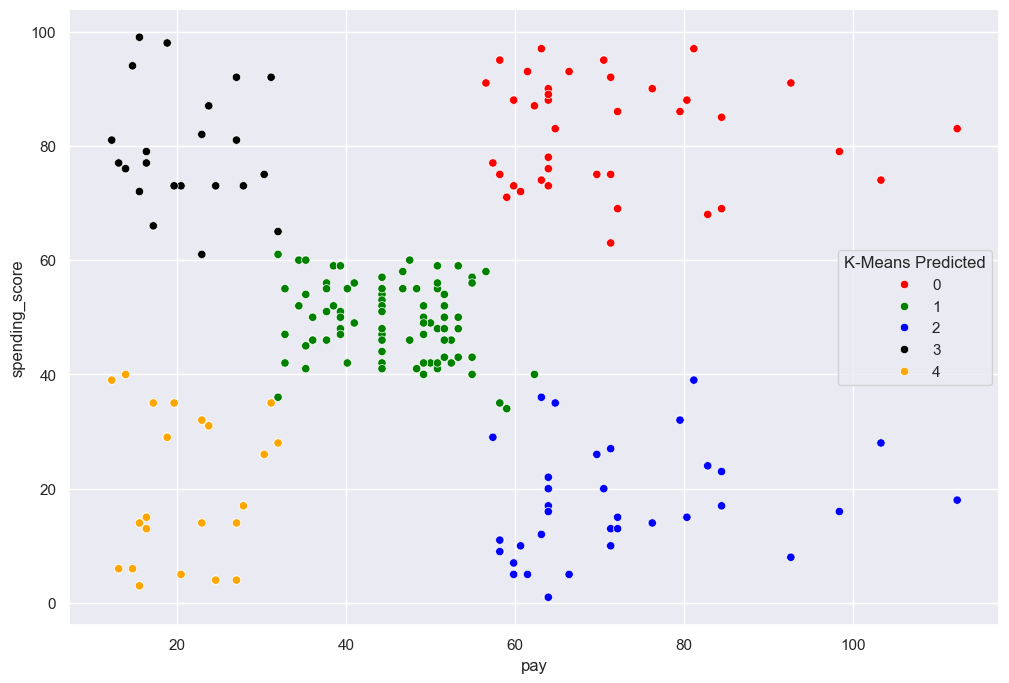

In [142]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='pay' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

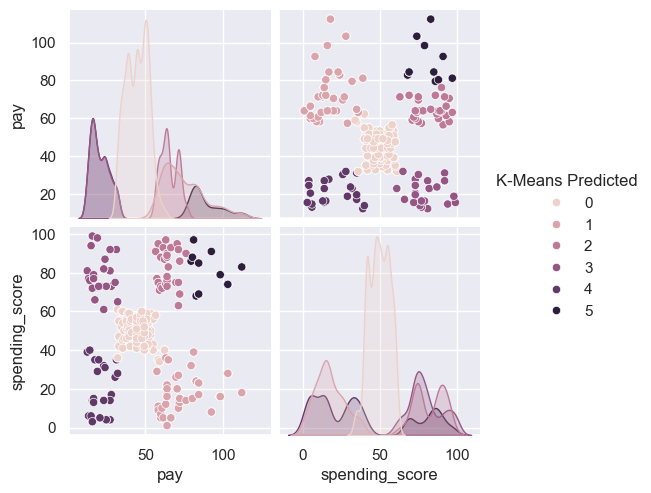

In [143]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [144]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
0    774
1    330
4    271
3    269
2    238
5    118
Name: count, dtype: int64

##### Using 6 clusters has not impacted the large middle groupings size, but instead split the smaller groups further. Therefore, I would keep to the 5 clusters over 6

In [146]:
# View the K-Means predicted.
print(x.head())

     pay  spending_score  K-Means Predicted
0  12.30              39                  4
1  12.30              81                  3
2  13.12               6                  4
3  13.12              77                  3
4  13.94              40                  4


<Axes: xlabel='pay', ylabel='spending_score'>

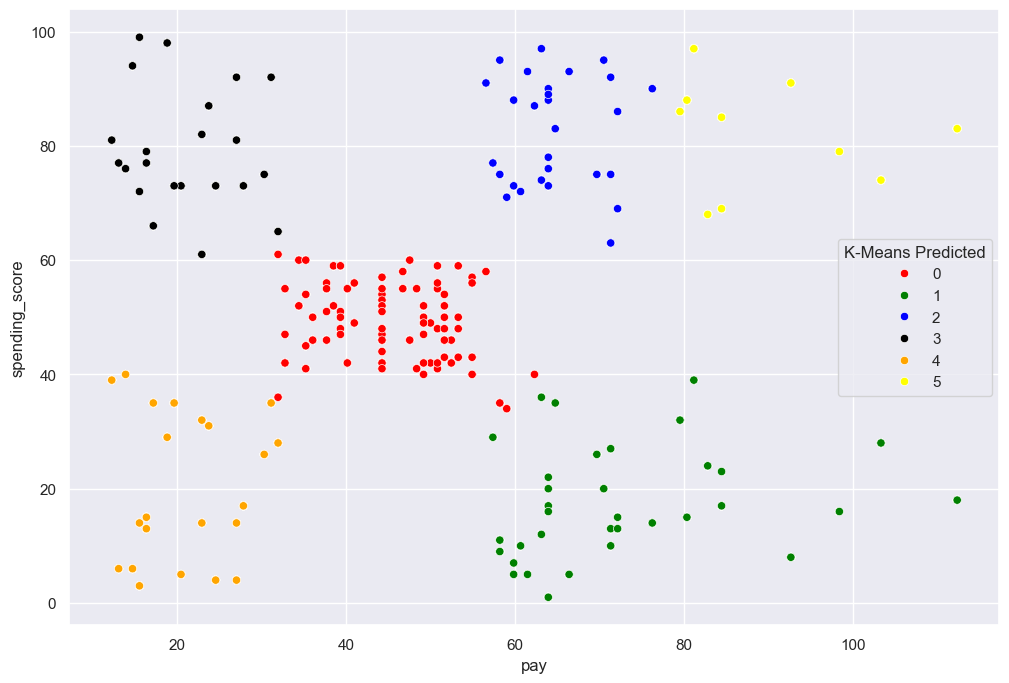

In [147]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='pay' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange', 'yellow'])

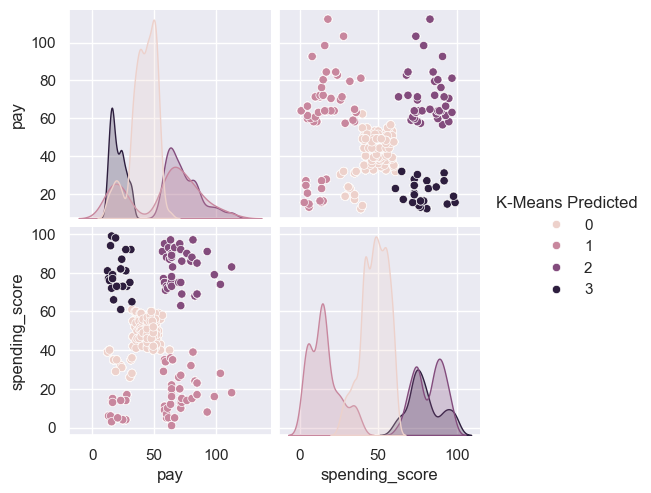

In [148]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [149]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
0    877
1    498
2    356
3    269
Name: count, dtype: int64

In [150]:
# View the K-Means predicted.
print(x.head())

     pay  spending_score  K-Means Predicted
0  12.30              39                  0
1  12.30              81                  3
2  13.12               6                  1
3  13.12              77                  3
4  13.94              40                  0


<Axes: xlabel='pay', ylabel='spending_score'>

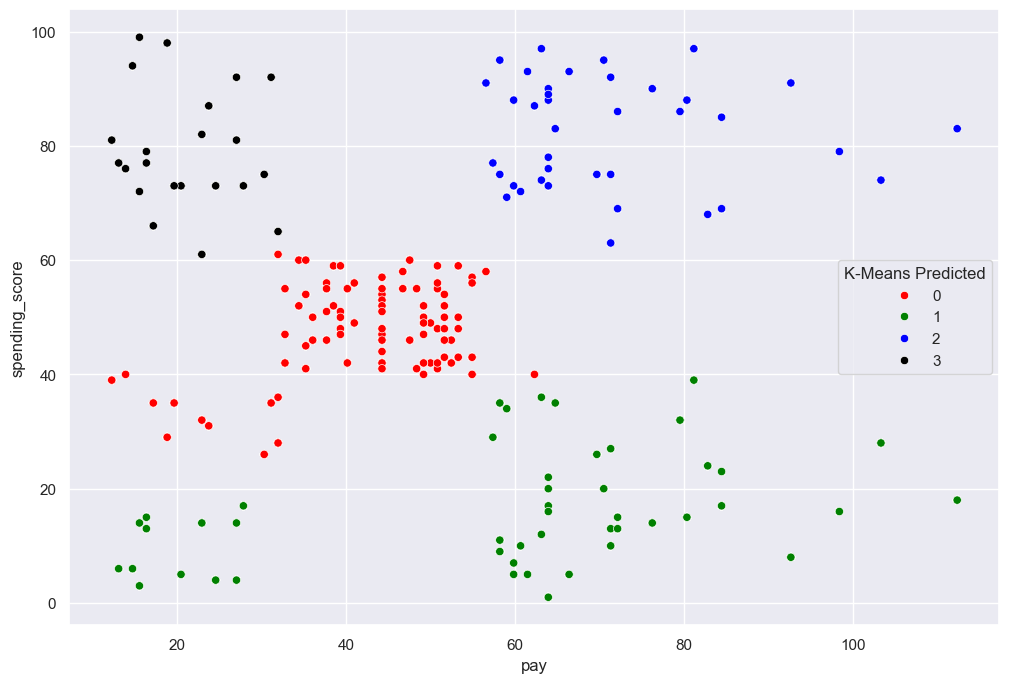

In [151]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='pay' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

##### The model with 4 clusters feels more confusing than 5, as the clusters are less well defined an more difficult to explain and describe. It appears there is: 
- low spending score cluster
- mid/low spending score and pay
- low pay, high spending score
- high pay, low spending score

There is less synergy in the model vs. the 5 cluster model. From the Elbow method and Silhotte method, it also does not look optimal vs. 5 clusters either. Therefore, I will stick with 5 clusters. 

## 5. Fit final model and justify your choice

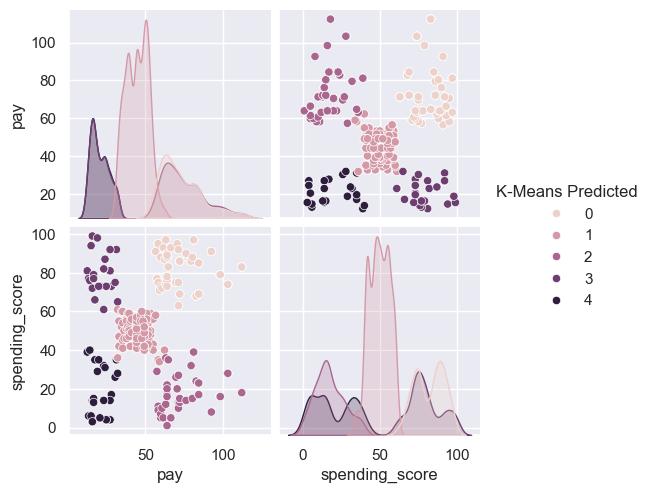

In [154]:
# Apply the final model.
# Use the 5 cluster model:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [155]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64

## 6. Plot and interpret the clusters

In [157]:
# View the K-Means predicted.
print(x.head())

     pay  spending_score  K-Means Predicted
0  12.30              39                  4
1  12.30              81                  3
2  13.12               6                  4
3  13.12              77                  3
4  13.94              40                  4


<Axes: xlabel='pay', ylabel='spending_score'>

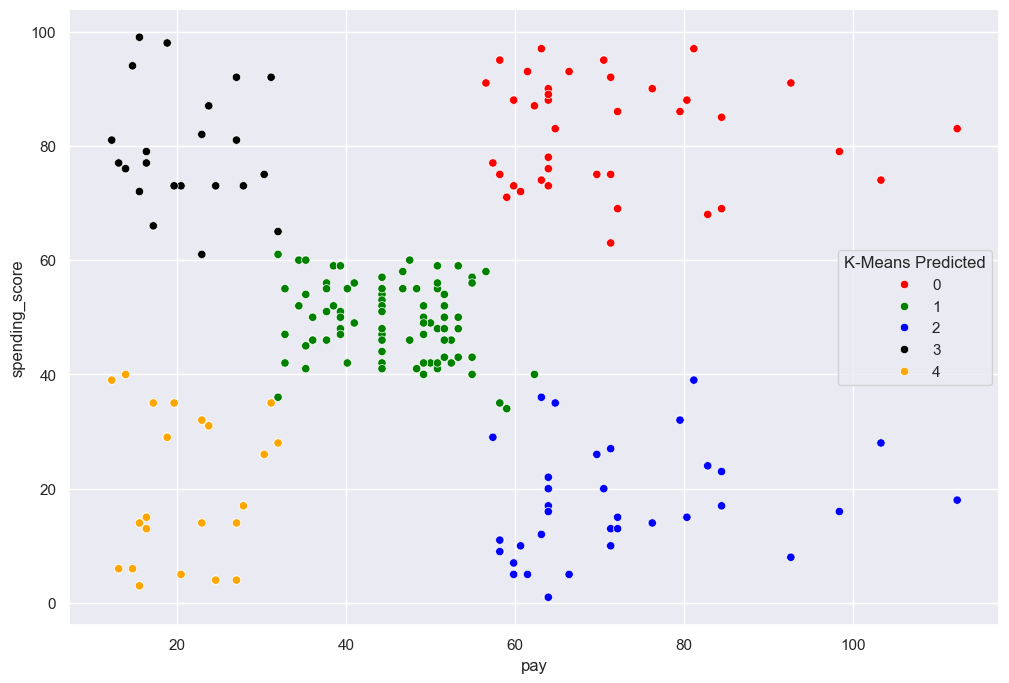

In [158]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='pay' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])


## 7. Discuss: Insights and observations

***Your observations here...***

##### There are 5 clusters identified in terms of a relationship between pay and spending score. These can be easily explained as the below groupings:

0. high pay & high spending score
1. medium pay & medium spending score
2. high pay & low spending score
3. low pay & high spending score
4. low pay & low spending score

The marketing team can use these clusters to better target their messaging to relevant cohorts. For example, if a user has high pay but is a low spender (i.e. Cluster 2), there is clear opportunity to try and migrate them to become high spenders (i.e. Cluster 0). 

Given the relationship identified previously between loyalty points and spending score/pay, I suspect these clusters will map well to expected loyalty points. The marketing team could use this clustering to target high value customers (i.e. high pay & high spending score). 

To test the relationship between clusters and loyalty points , I will add the clusters to the data set and check the mean loyalty points per cluster. 

In [161]:
# Add the clusters as a new column in the original dataframe
# Doubled check the order of data hasn't been changed in the dataframe created for the model vs. the original dataframe
trc3.head()

gender  age    pay  spending_score  loyalty_points education  product  \
0    Male   18  12.30              39             210  graduate      453   
1    Male   23  12.30              81             524  graduate      466   
2  Female   22  13.12               6              40  graduate      254   
3  Female   25  13.12              77             562  graduate      263   
4  Female   33  13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

x.head()

In [163]:
trc3.tail()

gender  age    pay  spending_score  loyalty_points education  product  \
1995  Female   37  84.46              69            4031       PhD      977   
1996  Female   43  92.66               8             539       PhD      979   
1997    Male   34  92.66              91            5614  graduate     1012   
1998    Male   34  98.40              16            1048       PhD     1031   
1999    Male   32  92.66               8             479       PhD      453   

                                                 review  \
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                             summary  
1995  The perfect word game for mixed ages (with Mom  
1996                                       Super fun  
1997                                      Great Game  
1998                                      Four Stars  
1999                                  Love this game

In [164]:
x.tail()

pay  spending_score  K-Means Predicted
1995  84.46              69                  0
1996  92.66               8                  2
1997  92.66              91                  0
1998  98.40              16                  2
1999  92.66               8                  2

#### The models appear to be in the same order, so I will now add a column to the original dataset with the clusters

In [166]:
# Add clusters to the original dataframe
trc3['cluster'] = kmeans.labels_

trc3.head()

gender  age    pay  spending_score  loyalty_points education  product  \
0    Male   18  12.30              39             210  graduate      453   
1    Male   23  12.30              81             524  graduate      466   
2  Female   22  13.12               6              40  graduate      254   
3  Female   25  13.12              77             562  graduate      263   
4  Female   33  13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  cluster  
0  The fact that 50% of this space is wasted on a...        4  
1  Another worthless Dungeon Master's screen from...        3  
2                    pretty, but also pretty useless        4  
3                                         Five Stars        3  
4                                         Money trap        4

In [167]:
# Export dataframe to CSV file
trc3.to_csv('tr_clean_clusters.csv', index = False)

In [168]:
# Group data by clusters and check the mean spending_score, pay and loyalty points
cluster_means = trc3.groupby('cluster')[['pay', 'spending_score', 'loyalty_points']].mean().round()

cluster_means

pay  spending_score  loyalty_points
cluster                                      
0        73.0            82.0          3988.0
1        44.0            50.0          1420.0
2        75.0            17.0           912.0
3        20.0            79.0           972.0
4        20.0            20.0           275.0

# 

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [172]:
# Install wordcloud
!pip install wordcloud

In [173]:
!pip install textblob

In [174]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [175]:
# Load the CSV file(s) as trc4
trc4 = pd.read_csv('tr_clean.csv')

# View DataFrame.
trc4.head()


gender  age    pay  spending_score  loyalty_points education  product  \
0    Male   18  12.30              39             210  graduate      453   
1    Male   23  12.30              81             524  graduate      466   
2  Female   22  13.12               6              40  graduate      254   
3  Female   25  13.12              77             562  graduate      263   
4  Female   33  13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [176]:
# Explore data set.
trc4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   pay             2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [177]:
# Keep necessary columns. Drop unnecessary columns.
trc4 = trc4.drop(columns=['gender', 
                          'age', 'pay', 
                          'spending_score', 
                          'loyalty_points', 
                          'education', 'product'])

# View DataFrame.
trc4.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [178]:
# Determine if there are any missing values.
trc4.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [180]:
# Review: Change all to lower case and join with a space.
trc4['review'] = trc4['review'].astype(str).str.lower()

trc4.head()

review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*:\n\nyour unpaint...   
2  nice art, nice printing.  why two panels are f...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [181]:
# Summary: Change all to lower case and join with a space.
trc4['summary'] = trc4['summary'].astype(str).str.lower()

trc4.head()

review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*:\n\nyour unpaint...   
2  nice art, nice printing.  why two panels are f...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

In [182]:
# Check the format of the 'review' column to ensure a string of sentences
print(type(trc4['review'].iloc[0])) 

<class 'str'>


In [183]:
# Check the format of the 'summary' column to ensure a string of sentences
print(type(trc4['summary'].iloc[0])) 

<class 'str'>


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [185]:
# Replace all the punctuations in review column.
import string
trc4['review'] = trc4['review'].str.replace(f"[{string.punctuation}]"," ", regex=True)

# View output.
trc4.head()

review  \
0  when it comes to a dm s screen  the space on t...   
1  an open letter to galeforce9  \n\nyour unpaint...   
2  nice art  nice printing   why two panels are f...   
3  amazing buy  bought it as a gift for our new d...   
4  as my review of gf9 s previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

In [186]:
# Replace all the punctuations in summary column.
trc4['summary'] = trc4['summary'].str.replace(f"[{string.punctuation}]"," ")

# View output.
trc4.head()

review  \
0  when it comes to a dm s screen  the space on t...   
1  an open letter to galeforce9  \n\nyour unpaint...   
2  nice art  nice printing   why two panels are f...   
3  amazing buy  bought it as a gift for our new d...   
4  as my review of gf9 s previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

### 2c) Drop duplicates in both columns

In [188]:
# Drop duplicates in both columns.
trc4_dedup = trc4.drop_duplicates(subset=['review', 'summary'])

# View DataFrame.
trc4_dedup.head()

review  \
0  when it comes to a dm s screen  the space on t...   
1  an open letter to galeforce9  \n\nyour unpaint...   
2  nice art  nice printing   why two panels are f...   
3  amazing buy  bought it as a gift for our new d...   
4  as my review of gf9 s previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

In [189]:
# Create variables for duplicate summaries, unique summaries and total summaries
trc4_dedup.count()



review     1973
summary    1973
dtype: int64

## 3. Tokenise and create wordclouds

In [191]:
# Create new DataFrame (copy DataFrame).
trc_new = trc4_dedup.copy()

# View DataFrame.
trc_new

review  \
0     when it comes to a dm s screen  the space on t...   
1     an open letter to galeforce9  \n\nyour unpaint...   
2     nice art  nice printing   why two panels are f...   
3     amazing buy  bought it as a gift for our new d...   
4     as my review of gf9 s previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages  with mom...   
1996  great game   did not think i would like it whe...   
1997  great game for all         \nkeeps the mind ni...   
1998                                          fun game    
1999  this game is fun  a lot like scrabble without ...   

                                                summary  
0     the fact that 50% of this space is wasted on a...  
1     another worthless dungeon master's screen from...  
2                       pretty, but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995     the perfect word game for mixed ages (with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[1973 rows x 2 columns]

In [192]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/philbest/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [193]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/philbest/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [194]:
# Import the function.
from nltk.tokenize import word_tokenize

# Apply tokenization to the 'review' column
trc_new['review_tokenized'] = trc_new['review'].apply(word_tokenize)

# Check the result
trc_new['review_tokenized'].head()


0    [when, it, comes, to, a, dm, s, screen, the, s...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9, s, previous, screens...
Name: review_tokenized, dtype: object

In [195]:
# Apply tokenization to the 'summary' column
trc_new['summary_tokenized'] = trc_new['summary'].apply(word_tokenize)

# Check the result
trc_new['summary_tokenized'].head()

0    [the, fact, that, 50, %, of, this, space, is, ...
1    [another, worthless, dungeon, master, 's, scre...
2              [pretty, ,, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_tokenized, dtype: object

In [196]:
# Check dataframe
trc_new.head()

review  \
0  when it comes to a dm s screen  the space on t...   
1  an open letter to galeforce9  \n\nyour unpaint...   
2  nice art  nice printing   why two panels are f...   
3  amazing buy  bought it as a gift for our new d...   
4  as my review of gf9 s previous screens these w...   

                                             summary  \
0  the fact that 50% of this space is wasted on a...   
1  another worthless dungeon master's screen from...   
2                    pretty, but also pretty useless   
3                                         five stars   
4                                         money trap   

                                    review_tokenized  \
0  [when, it, comes, to, a, dm, s, screen, the, s...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9, s, previous, screens...   

                                   summary_tokenized  
0  [the, fact, that, 50, %, of, this, space, is, ...  
1  [another, worthless, dungeon, master, 's, scre...  
2            [pretty, ,, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

In [197]:
# Review: Create list of words from review_tokenized column
review_tokens = [word for review in trc_new['review_tokenized'] for word in review]

# Import the class
from nltk.probability import FreqDist

# Create a frequency distribution object
freq_review_tokens = FreqDist(review_tokens)

# Show the five most common elements in the data set
freq_review_tokens.most_common(5)

[('the', 5464), ('and', 3252), ('a', 3190), ('to', 3170), ('of', 2499)]

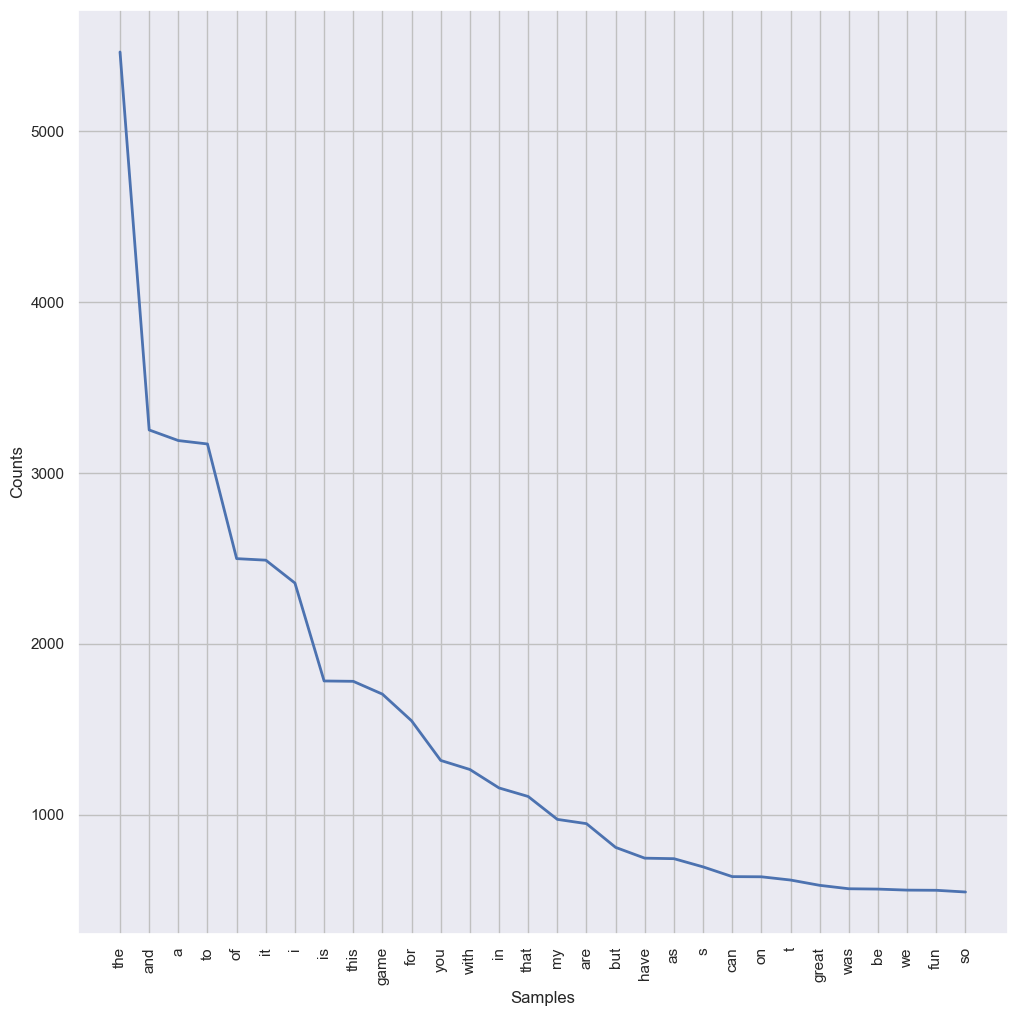

In [198]:
# Review: Plot the the most frequent words
# Define the figure and axes
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(12, 12)

# Plot the data set
freq_review_tokens.plot(30, cumulative=False)

# Display the result
plt.show()

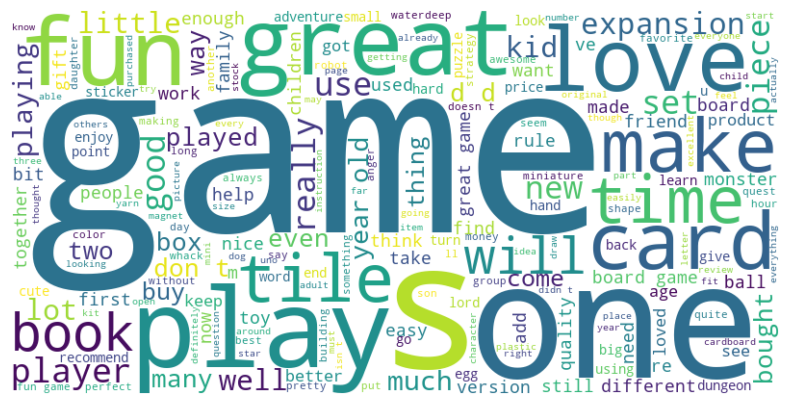

In [199]:
# Review: Create a wordcloud
# Flatten the list in review_tokens into a string
review_text = " ".join(word for review in trc_new['review_tokenized'] for word in review)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [200]:
# Summary: Create list of words from review_tokenized column
summary_tokens = [word for summary in trc_new['summary_tokenized'] for word in summary]

# Import the class
from nltk.probability import FreqDist

# Create a frequency distribution object
freq_summary_tokens = FreqDist(summary_tokens)

# Show the five most common elements in the data set
freq_summary_tokens.most_common(5)

[('stars', 439), ('!', 426), ('five', 354), ('game', 318), ('great', 294)]

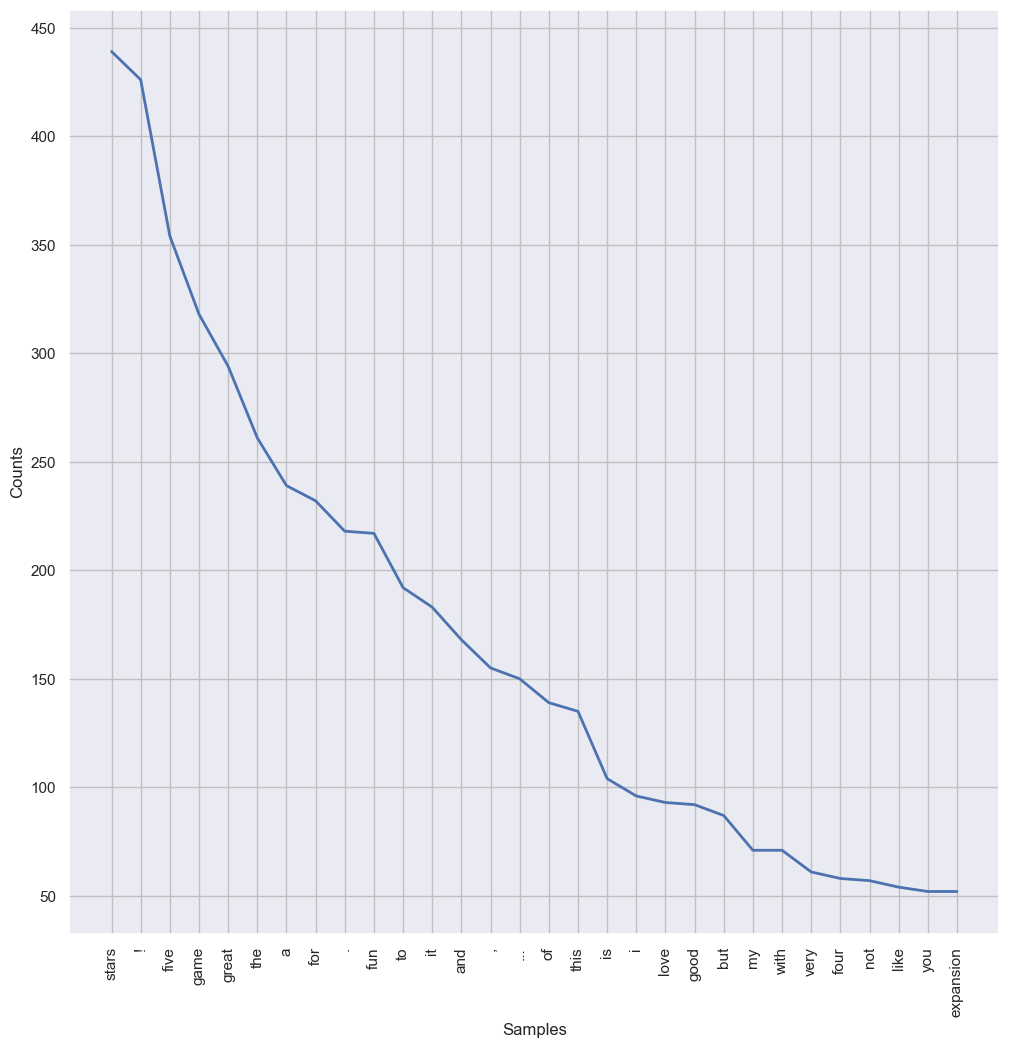

In [201]:
# Summary: Plot the the most frequent words
# Define the figure and axes
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(12, 12)

# Plot the data set
freq_summary_tokens.plot(30, cumulative=False)

# Display the result
plt.show()

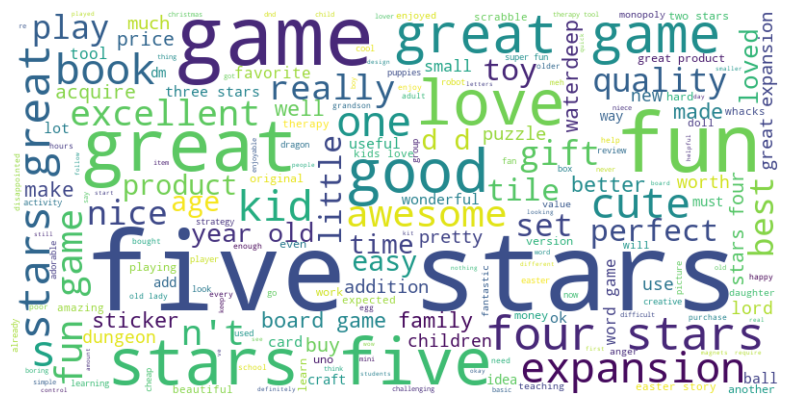

In [202]:
# Summary: Create a wordcloud
# Flatten the list in review_tokens into a string
summary_text = " ".join(word for review in trc_new['summary_tokenized'] for word in review)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [204]:
# Review: Create a frequency distribution object
freq_review_tokens = FreqDist(review_tokens)

# Show the five most common elements in the data set
freq_review_tokens.most_common(5)

[('the', 5464), ('and', 3252), ('a', 3190), ('to', 3170), ('of', 2499)]

In [205]:
# Summary: Create a frequency distribution object
freq_summary_tokens = FreqDist(summary_tokens)

# Show the five most common elements in the data set
freq_summary_tokens.most_common(5)

[('stars', 439), ('!', 426), ('five', 354), ('game', 318), ('great', 294)]

### 4b) Remove alphanumeric characters and stopwords

In [207]:
# Import relevant function
import re

# Review: Delete all the alpanum.
review_tokens_abc = list(map(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x), review_tokens))

print("Review tokens removing non-alphanumeric characters (first 10 words):", review_tokens_abc[:10])


Review tokens removing non-alphanumeric characters (first 10 words): ['when', 'it', 'comes', 'to', 'a', 'dm', 's', 'screen', 'the', 'space']


In [208]:
# Summary: Delete all the alpanum.
summary_tokens_abc = list(map(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x), summary_tokens))

print("Summary tokens removing non-alphanumeric characters (first 10 words):", summary_tokens_abc[:10])

Summary tokens removing non-alphanumeric characters (first 10 words): ['the', 'fact', 'that', '50', '', 'of', 'this', 'space', 'is', 'wasted']


In [209]:
# Remove all the stopwords
# Download the stopwords.
nltk.download('stopwords')

# Import the package.
from nltk.corpus import stopwords

# Create a set of English stopwords.
stop_words = set(stopwords.words('english'))

# Display the set.
print(stop_words)

{"needn't", 'hers', 'above', "doesn't", 'why', "we'd", 'isn', "shouldn't", "wasn't", "wouldn't", 'was', "he'll", "that'll", 'theirs', "you've", 'both', 'haven', "it'd", 'should', 'yourselves', 'who', 'only', 'does', "we'll", 'i', 'her', 'further', 'so', "mightn't", 'nor', 'won', "won't", 'there', 'will', 'the', 'is', "they're", 'again', 'all', 'of', 'an', 'how', 'themselves', 'by', 'll', 'being', 's', 'which', 'hadn', 'they', 'than', 'be', "couldn't", 'he', 'himself', 'didn', 'other', "isn't", 'yours', 'these', 'while', 'mightn', 'not', 'below', 'yourself', 'some', 'doesn', 'him', 'same', "you'd", 'y', 'myself', "i've", 'my', 'wasn', 't', 'our', 'and', 'no', 'off', 'where', 're', 'has', 'we', "aren't", 'are', 'on', 'herself', 'over', 'o', "they'd", 'their', "didn't", 'ain', 'once', 'couldn', 'or', "they'll", 'this', 'his', "mustn't", 'against', 'm', 'up', "she'll", "it'll", 'having', 'when', "i'd", 'been', 'until', 'you', 'don', 'ours', 'such', 'but', 'just', 'that', 'needn', 'did', 'm

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/philbest/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [210]:
# Review: Create an empty list for the filtered words.
review_tokens_flt = []

# Filter review_tokens
for each_word in review_tokens_abc:
    if each_word not in stop_words:
        review_tokens_flt.append(each_word)
        
# Display the filtered list.      
print("Review tokens without stopwords (first 10):", review_tokens_flt[:10])

Review tokens without stopwords (first 10): ['comes', 'dm', 'screen', 'space', 'screen', 'absolute', 'premium', 'fact', '50', 'space']


In [211]:
# Review: Remove empty spaces
review_tokens_final = [word for word in review_tokens_flt if word != '']

# Display the new list 
print("Review tokens without stopwords (first 10):", review_tokens_final[:10])

Review tokens without stopwords (first 10): ['comes', 'dm', 'screen', 'space', 'screen', 'absolute', 'premium', 'fact', '50', 'space']


In [212]:
# Summary: Create an empty list for the filtered words.
summary_tokens_flt = []

# Filter review_tokens
for each_word in summary_tokens_abc:
    if each_word not in stop_words:
        summary_tokens_flt.append(each_word)
        
# Display the filtered list.      
print("summary_tokens without stopwords (first 10):", summary_tokens_flt[:10])

summary_tokens without stopwords (first 10): ['fact', '50', '', 'space', 'wasted', 'art', '', 'terribly', 'informative', 'needed']


In [213]:
# Summary: Remove empty spaces
summary_tokens_final = [word for word in summary_tokens_flt if word != '']

# Display the new list 
print("Review tokens without stopwords (first 10):", summary_tokens_final[:10])

Review tokens without stopwords (first 10): ['fact', '50', 'space', 'wasted', 'art', 'terribly', 'informative', 'needed', 'art', 'another']


### 4c) Create wordcloud without stopwords

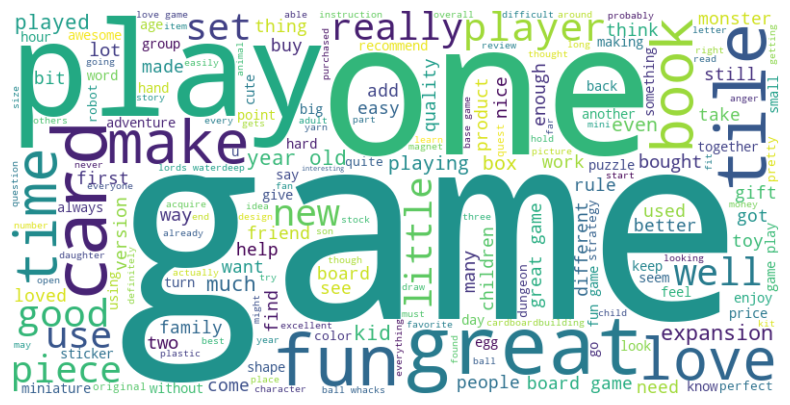

In [215]:
# Review: Create a wordcloud
# Flatten the list in review_tokens_flt into a string
review_text = " ".join(review_tokens_final)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

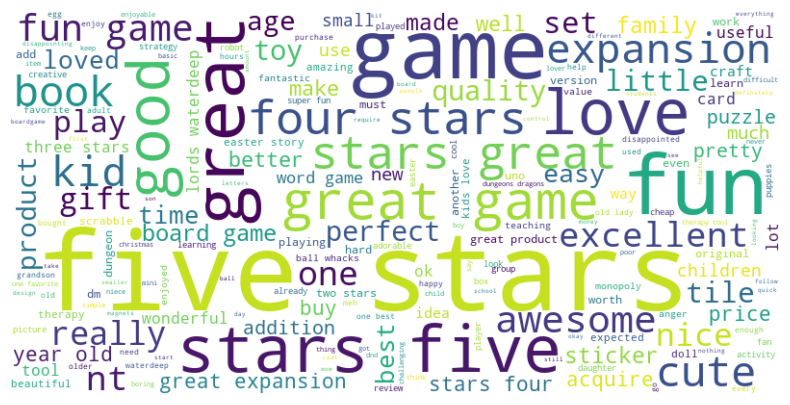

In [216]:
# Summary: Create a wordcloud
# Flatten the list in review_tokens_flt into a string
summary_text = " ".join(summary_tokens_final)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### 4d) Identify 15 most common words and polarity

In [218]:
# Review: Determine the 15 most common words.
# Create a frequency distribution object
freq_review_final = FreqDist(review_tokens_final)

# Get the top 15 most common words
top_review_words = freq_review_final.most_common(15)

# Calculate the polarity of each word
review_polarity = {word: TextBlob(word).sentiment.polarity for word, _ in top_review_words}

# Print results
review_polarity

{'game': -0.4,
 'great': 0.8,
 'fun': 0.3,
 'one': 0.0,
 'play': 0.0,
 'like': 0.0,
 'love': 0.5,
 'get': 0.0,
 'really': 0.2,
 'cards': 0.0,
 'tiles': 0.0,
 'time': 0.0,
 'good': 0.7,
 'would': 0.0,
 'book': 0.0}

In [219]:
# Summary: Determine the 15 most common words.
# Create a frequency distribution object
freq_summary_final = FreqDist(summary_tokens_final)

# Get the top 15 most common words
top_summary_words = freq_summary_final.most_common(15)

# Calculate the polarity of each word
summary_polarity = {word: TextBlob(word).sentiment.polarity for word, _ in top_summary_words}

# Print results
summary_polarity

{'stars': 0.0,
 'five': 0.0,
 'game': -0.4,
 'great': 0.8,
 'fun': 0.3,
 'love': 0.5,
 'good': 0.7,
 'four': 0.0,
 'like': 0.0,
 'expansion': 0.0,
 'kids': 0.0,
 'cute': 0.5,
 'book': 0.0,
 'nt': 0.0,
 'one': 0.0}

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [221]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [222]:
# Review: Add back in original copy of Reviews
trc_new = trc_new.merge(trc[['review']], left_index=True, right_index=True, how='left', suffixes=('', '_original'))

# View output.
trc_new[['review_original', 'review']].head()

review_original  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                              review  
0  when it comes to a dm s screen  the space on t...  
1  an open letter to galeforce9  \n\nyour unpaint...  
2  nice art  nice printing   why two panels are f...  
3  amazing buy  bought it as a gift for our new d...  
4  as my review of gf9 s previous screens these w...

In [223]:
trc_new.head()

review  \
0  when it comes to a dm s screen  the space on t...   
1  an open letter to galeforce9  \n\nyour unpaint...   
2  nice art  nice printing   why two panels are f...   
3  amazing buy  bought it as a gift for our new d...   
4  as my review of gf9 s previous screens these w...   

                                             summary  \
0  the fact that 50% of this space is wasted on a...   
1  another worthless dungeon master's screen from...   
2                    pretty, but also pretty useless   
3                                         five stars   
4                                         money trap   

                                    review_tokenized  \
0  [when, it, comes, to, a, dm, s, screen, the, s...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9, s, previous, screens...   

                                   summary_tokenized  \
0  [the, fact, that, 50, %, of, this, space, is, ...   
1  [another, worthless, dungeon, master, 's, scre...   
2            [pretty, ,, but, also, pretty, useless]   
3                                      [five, stars]   
4                                      [money, trap]   

                                     review_original  
0  When it comes to a DM's screen, the space on t...  
1  An Open Letter to GaleForce9*:\n\nYour unpaint...  
2  Nice art, nice printing.  Why two panels are f...  
3  Amazing buy! Bought it as a gift for our new d...  
4  As my review of GF9's previous screens these w...

In [224]:
# Determine polarity of both columns. 
# Review: Calculate polarity
trc_new['review_polarity'] = trc_new['review_original'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# View output.
trc_new[['review_original', 'review_polarity']].head()

review_original  review_polarity
0  When it comes to a DM's screen, the space on t...        -0.036111
1  An Open Letter to GaleForce9*:\n\nYour unpaint...         0.035952
2  Nice art, nice printing.  Why two panels are f...         0.116640
3  Amazing buy! Bought it as a gift for our new d...         0.628788
4  As my review of GF9's previous screens these w...        -0.316667

In [225]:
# Determine the descriptive statistics for review polarity
trc_new['review_polarity'].describe()

count    1973.000000
mean        0.222120
std         0.273159
min        -1.000000
25%         0.045860
50%         0.179731
75%         0.367188
max         1.000000
Name: review_polarity, dtype: float64

In [226]:
# Add review polarity to original dataframe
trc3['review_polarity'] = trc3['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

trc3.head()

gender  age    pay  spending_score  loyalty_points education  product  \
0    Male   18  12.30              39             210  graduate      453   
1    Male   23  12.30              81             524  graduate      466   
2  Female   22  13.12               6              40  graduate      254   
3  Female   25  13.12              77             562  graduate      263   
4  Female   33  13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  cluster  review_polarity  
0  The fact that 50% of this space is wasted on a...        4        -0.036111  
1  Another worthless Dungeon Master's screen from...        3         0.035952  
2                    pretty, but also pretty useless        4         0.116640  
3                                         Five Stars        3         0.628788  
4                                         Money trap        4        -0.316667

In [227]:
# Summary: Add back in original copy of Summary
trc_new = trc_new.merge(trc[['summary']], left_index=True, right_index=True, how='left', suffixes=('', '_original'))

# View output.
trc_new[['summary_original', 'summary']].head()

summary_original  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   
3                                         Five Stars   
4                                         Money trap   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

In [228]:
# Summary: Calculate polarity
trc_new['summary_polarity'] = trc_new['summary_original'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# View output.
trc_new[['summary_original', 'summary_polarity']].head()

summary_original  summary_polarity
0  The fact that 50% of this space is wasted on a...              0.15
1  Another worthless Dungeon Master's screen from...             -0.80
2                    pretty, but also pretty useless              0.00
3                                         Five Stars              0.00
4                                         Money trap              0.00

In [229]:
# Determine the descriptive statistics for summary polarity
trc_new['summary_polarity'].describe()

count    1973.000000
mean        0.231649
std         0.353066
min        -1.000000
25%         0.000000
50%         0.100000
75%         0.500000
max         1.000000
Name: summary_polarity, dtype: float64

In [230]:
# Add summary polarity to original dataframe
trc3['summary_polarity'] = trc3['summary'].apply(lambda x: TextBlob(x).sentiment.polarity)

trc3.head()

gender  age    pay  spending_score  loyalty_points education  product  \
0    Male   18  12.30              39             210  graduate      453   
1    Male   23  12.30              81             524  graduate      466   
2  Female   22  13.12               6              40  graduate      254   
3  Female   25  13.12              77             562  graduate      263   
4  Female   33  13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  cluster  \
0  The fact that 50% of this space is wasted on a...        4   
1  Another worthless Dungeon Master's screen from...        3   
2                    pretty, but also pretty useless        4   
3                                         Five Stars        3   
4                                         Money trap        4   

   review_polarity  summary_polarity  
0        -0.036111              0.15  
1         0.035952             -0.80  
2         0.116640              0.00  
3         0.628788              0.00  
4        -0.316667              0.00

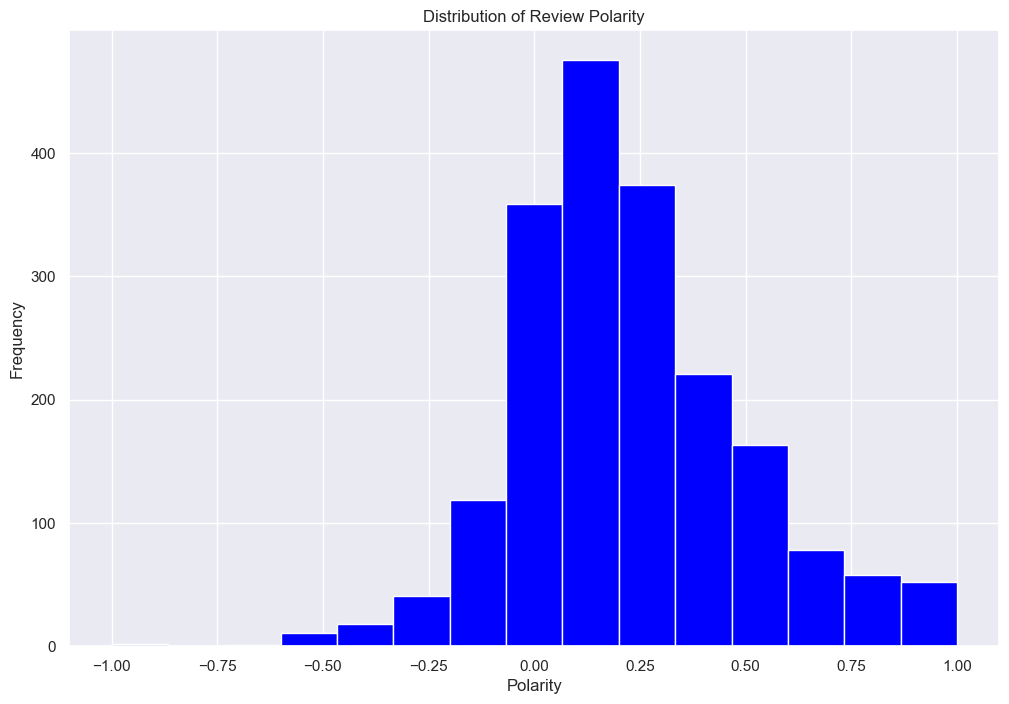

In [231]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
trc_new['review_polarity'].hist(bins=15, color='blue')

# Add a title and labels
plt.title("Distribution of Review Polarity")
plt.xlabel("Polarity")
plt.ylabel("Frequency")

# Show the plot
plt.show()


In [232]:
# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Define SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply Sentiment Analysis to review column
trc_new['review_sentiment'] = trc_new['review_original'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

trc_new[['review_original', 'review_sentiment']].head()

review_original  review_sentiment
0  When it comes to a DM's screen, the space on t...           -0.7406
1  An Open Letter to GaleForce9*:\n\nYour unpaint...            0.9433
2  Nice art, nice printing.  Why two panels are f...            0.6939
3  Amazing buy! Bought it as a gift for our new d...            0.8997
4  As my review of GF9's previous screens these w...           -0.6808

In [233]:
# Add Review sentiment score to original dataframe
trc3['review_sentiment'] = trc3['review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

trc3.head()

gender  age    pay  spending_score  loyalty_points education  product  \
0    Male   18  12.30              39             210  graduate      453   
1    Male   23  12.30              81             524  graduate      466   
2  Female   22  13.12               6              40  graduate      254   
3  Female   25  13.12              77             562  graduate      263   
4  Female   33  13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  cluster  \
0  The fact that 50% of this space is wasted on a...        4   
1  Another worthless Dungeon Master's screen from...        3   
2                    pretty, but also pretty useless        4   
3                                         Five Stars        3   
4                                         Money trap        4   

   review_polarity  summary_polarity  review_sentiment  
0        -0.036111              0.15           -0.7406  
1         0.035952             -0.80            0.9433  
2         0.116640              0.00            0.6939  
3         0.628788              0.00            0.8997  
4        -0.316667              0.00           -0.6808

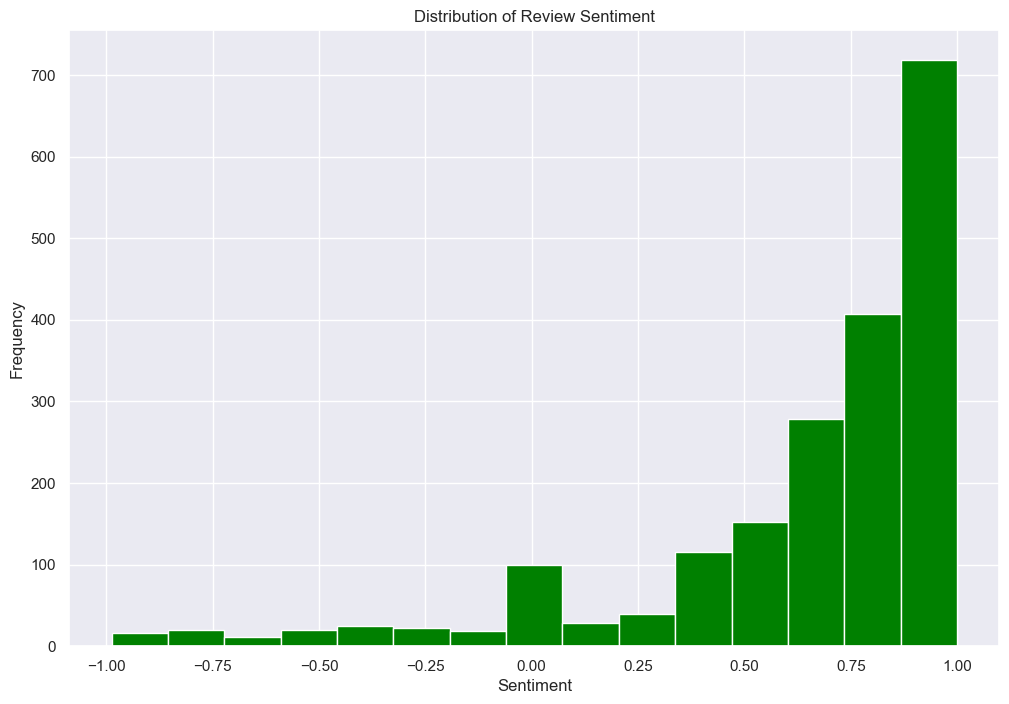

In [234]:
# Review: Create a histogram for Sentiment Score
# Histogram of polarity
trc_new['review_sentiment'].hist(bins=15, color='green')

# Add a title and labels
plt.title("Distribution of Review Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")

# Show the plot
plt.show()

##### Polarity is slightly skewed positive, however Sentiment score is extremely positive, demonstrating the models work in different ways. More analysis to be done to see which is more accurate for the Review column

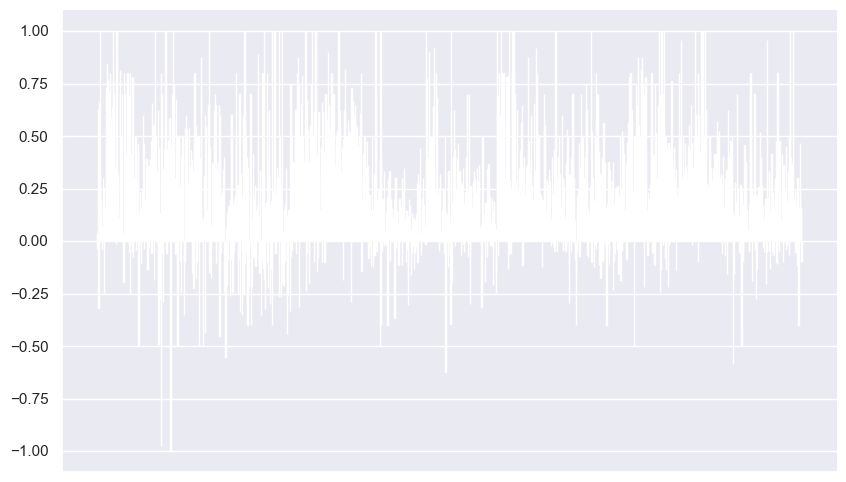

In [236]:
# Create the bar chart
plt.figure(figsize=(10, 6))
sorted_polarity = trc_new['review_polarity'].sort_values()
plt.bar(sorted_polarity.index, sorted_polarity, color='orange')

# Remove chart borders (spines)
ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove x-axis labels
ax.get_xaxis().set_visible(False)

# Show the plot
plt.show()

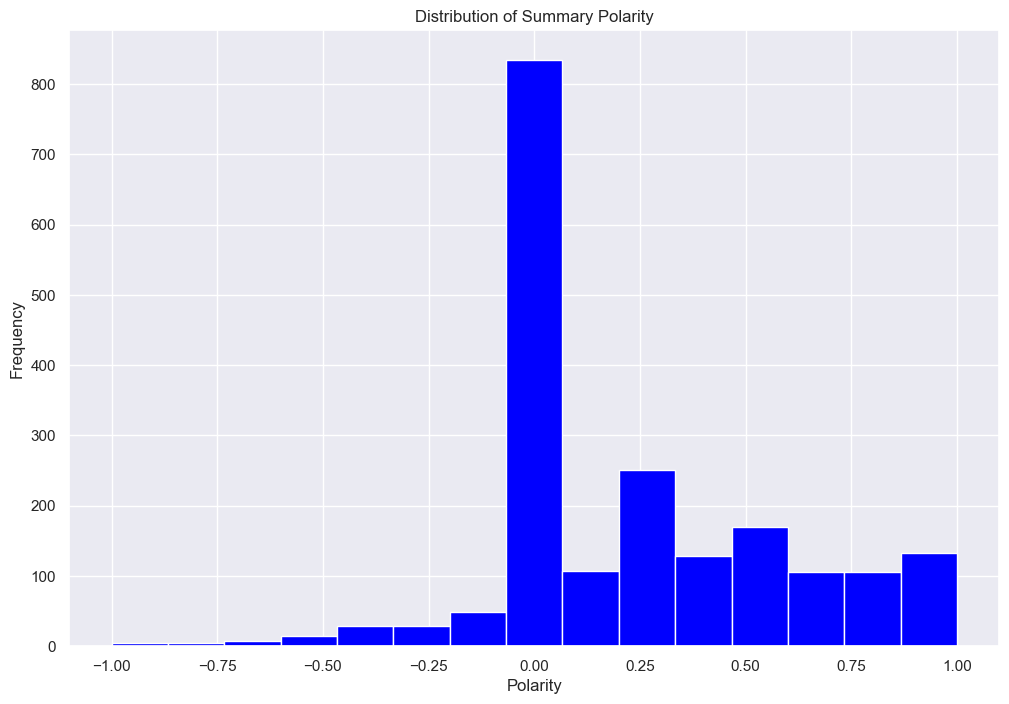

In [237]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
trc_new['summary_polarity'].hist(bins=15, color='blue')

# Add a title and labels
plt.title("Distribution of Summary Polarity")
plt.xlabel("Polarity")
plt.ylabel("Frequency")

# Show the plot
plt.show()


In [238]:
# Apply Sentiment Analysis to summary column
trc_new['summary_sentiment'] = trc_new['summary_original'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

trc_new[['summary_original', 'summary_sentiment']].head()

summary_original  summary_sentiment
0  The fact that 50% of this space is wasted on a...            -0.0711
1  Another worthless Dungeon Master's screen from...            -0.4404
2                    pretty, but also pretty useless             0.4019
3                                         Five Stars             0.0000
4                                         Money trap            -0.3182

In [239]:
# Add Summary sentiment score to original dataframe
trc3['summary_sentiment'] = trc3['summary'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

trc3.head()

gender  age    pay  spending_score  loyalty_points education  product  \
0    Male   18  12.30              39             210  graduate      453   
1    Male   23  12.30              81             524  graduate      466   
2  Female   22  13.12               6              40  graduate      254   
3  Female   25  13.12              77             562  graduate      263   
4  Female   33  13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  cluster  \
0  The fact that 50% of this space is wasted on a...        4   
1  Another worthless Dungeon Master's screen from...        3   
2                    pretty, but also pretty useless        4   
3                                         Five Stars        3   
4                                         Money trap        4   

   review_polarity  summary_polarity  review_sentiment  summary_sentiment  
0        -0.036111              0.15           -0.7406            -0.0711  
1         0.035952             -0.80            0.9433            -0.4404  
2         0.116640              0.00            0.6939             0.4019  
3         0.628788              0.00            0.8997             0.0000  
4        -0.316667              0.00           -0.6808            -0.3182

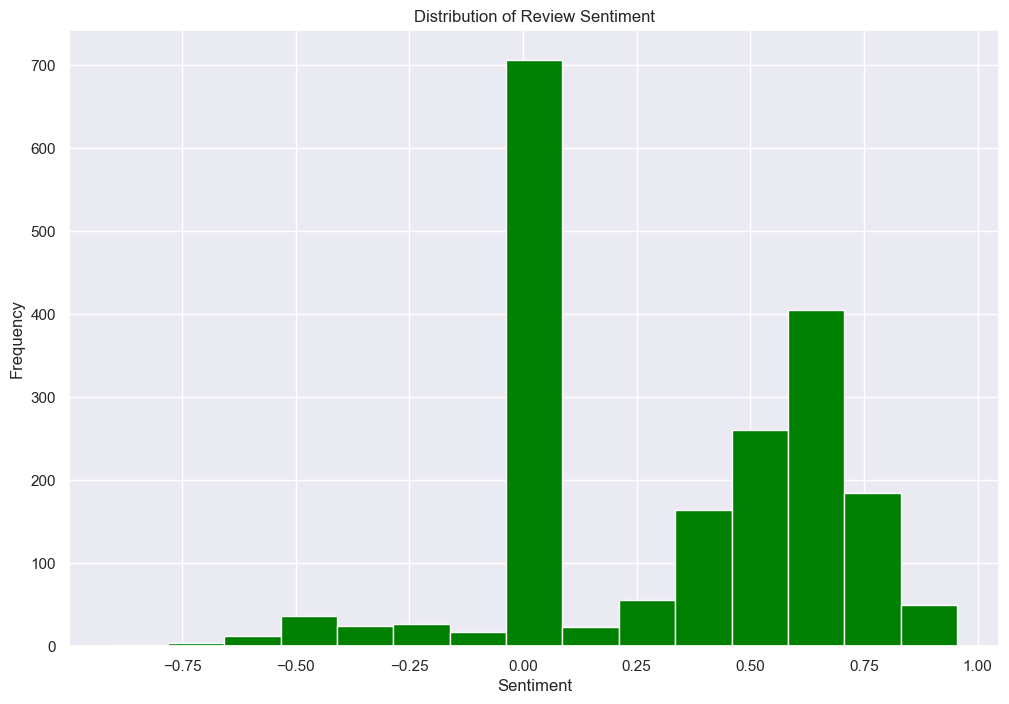

In [240]:
# Review: Create a histogram for Sentiment Score
# Histogram of polarity
trc_new['summary_sentiment'].hist(bins=15, color='green')

# Add a title and labels
plt.title("Distribution of Review Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")

# Show the plot
plt.show()

##### Sentiment score and Polarity have similar shapes for Summary, demonstrating the 2 models are interpreting the data in similar ways. A significant proportion of summaries appear to not show any sentiment or polarity

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [243]:
# Review: Top 20 negative reviews using Polarity
top_20_negative_polarity = trc_new.nsmallest(20, 'review_polarity')[['review_original', 'review_polarity', 'review_sentiment']]

pd.set_option('display.max_colwidth', None)  # Show full tex

# View output.
top_20_negative_polarity


review_original  \
208                                                                                                                                                                       BOOO  UNLES YOU ARE PATIENT KNOW HOW TO MEASURE I DIDN'T HAVE THE PATIENCE NEITHER DID MY DAUGHTER.  BORING UNLESS YOU ARE A CRAFT PERSON WHICH I AM NOT.   
182                                                                                                                                                                                                                                                                                            Incomplete kit!  Very disappointing!   
989                                                                                                                                If you, like me, used to play D&D, but now you and your friends "growed up" and can't be together because all the responsibilities and bla bla bla... this game is for you! Come to the Dungeon!   
1804                                                                                                                                                                                                                                                   I'm sorry. I just find this product to be boring and, to be frank, juvenile.   
364                                                                                            One of my staff will be using this game soon, so I don't know how well it works as yet, but after looking at the cards, I believe it will be helpful in getting a conversation started regarding anger and what to do to control it.   
117                                                                                                                                                                                                                   I bought this as a Christmas gift for my grandson.  Its a sticker book. So how can I go wrong with this gift.   
227                                                                                                                                                                                                                                                                   this was a gift for my daughter.  I found it difficult to use   
230                                                                                                                                                                                                                                                                                                I found the directions difficult   
290                                                                                                                                                                                                                                                                                          Instructions are complicated to follow   
301                                                                                                                                                                                                                                                                                                                       Difficult   
803                                                                                                                                                                                                                                                                                                           This game is a blast!   
1524                                                                                                                                                                                                                                                                                                    Expensive for what you get.   
1829                                                     

In [244]:
# Review: Add a new column for manual rating
trc_new['manual_rating'] = None

# Assign manual rating for top 20 negative reviews using polarity
trc_new.loc[208, 'manual_rating'] =-1
trc_new.loc[182, 'manual_rating'] =-1
trc_new.loc[989, 'manual_rating'] =1
trc_new.loc[1804, 'manual_rating'] =-1
trc_new.loc[364, 'manual_rating'] =1
trc_new.loc[117, 'manual_rating'] =-1
trc_new.loc[227, 'manual_rating'] =-1
trc_new.loc[230, 'manual_rating'] =-1
trc_new.loc[290, 'manual_rating'] =-1
trc_new.loc[301, 'manual_rating'] =-1
trc_new.loc[803, 'manual_rating'] =1
trc_new.loc[1524, 'manual_rating'] =-1
trc_new.loc[1829, 'manual_rating'] =-1
trc_new.loc[174, 'manual_rating'] =-1
trc_new.loc[347, 'manual_rating'] =-1
trc_new.loc[538, 'manual_rating'] =-1
trc_new.loc[306, 'manual_rating'] =-1
trc_new.loc[427, 'manual_rating'] =1
trc_new.loc[437, 'manual_rating'] =-1
trc_new.loc[497, 'manual_rating'] =1

trc_new[['review_original', 'review_polarity', 'review_sentiment','manual_rating']].head()

review_original  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are "meh". Your DM screens, however, are freaking terrible. I'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. Once again, you've created a single use screen that is only useful when running the "Storm King's Thunder" adventure. Even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. I massive swath of the inner panel is wasted on artwork and a bloated overland map, which could have been easily reduced to a single panel in size. And the few table you have are nigh-useless themselves.\n\nIn short, stop making crap DM screens.   
2  Nice art, nice printing.  Why two panels are filled with a general Forgotten Realms map is beyond me.  Most of one of them is all blue ocean.  Such a waste.\n\nI don't understand why they can't make these DM Screens more useful for these "kinds of adventures" rather than solely the specific adventure.  You're supposed to be able to transpose this adventure to other lands outside the Forgotten Realms.  So even just a list of new monsters or NPCs would at least be useful than the map.  Even more would just be stuff related to running the game but broad-use stuff related to giants.\n\nSame thing with Curse of Strahd.  Why not make it useful for raven loft, undead or horror campaigns in general... instead a huge amount of screen space is solely mapping out Castle Ravenloft, which is only useful during a small fraction of the time even for the Curse of Strahd adventure, let alone various other Ravenloft adventuring.\n\nThey really kill the extended use of these screens by not thinking about their potential use, both for the adventure in question, as well as use in a broader sense.\n\nThe Rage of Demons scr

In [245]:
# Review: Top 20 negative reviews using Sentiment Score
top_20_negative_sentiment = trc_new.nsmallest(20, 'review_sentiment')[['review_original', 'review_polarity', 'review_sentiment']]

# View output.
top_20_negative_sentiment

review_original  \
1119  Here is my review, cross-posted from boardgamegeek.com:\n\nI have fond memories of D&D from my youth, that I occasionally attempt to recapture. I remember the sense of vague foreboding conjured by RPG-like board games such as Runequest and Spacehulk. I had read some favorable reviews of the new "RPG-as-boardgame" series promoted by Wizards on the Coast, and I was excited to try this. I splunked down my hard-earned cash and amazon duly delivered a hefty box of dreams to my doorstep.\n\nWrath of Ashardalon and I had some good times initially. My friends and I gamely punched all the cardboard pieces out of the sprues. We love punching pieces out of sprues! It inspires a sense of childlike wonder and anticipation in us! This tile has a Horrid Chamber on it! That dungeon tile has dead bodies! Ooh, I wonder what a flaming sphere does? These cards all have various powers and spells on them! Look, you can play a dragon character! And the plastic figurines were enjoyable, similar to those plastic dinosaurs we all had as kids. Whee!\n\nSadly, that was the best part of the game. Everything went downhill when we actually started to play.\n\nThe game itself is a reductionist vision of a dungeon crawl. It is, unfortunately, so reductionist that is effectively a game of Munchkin, but without a sense of humor. I think the game designers must have sensed this, and to try to add a sense of danger and urgency to the game, they created a deck of sadistic Encounter cards to punish us for playing. (But more about those later.)\n\nThe players progress through the dungeon together. At every unexplored edge, they "kick down the door" and grow the dungeon by one (1) new dungeon tile, guaranteed to contain exactly one (1) new monster, and possible an Encounter card (which is invariably unpleasant). This game might have been interesting if every new corner of the dungeon had produced a novel challenge for the players to make strategic decisions about together. Instead, the players typically have one power which is the min-max best option for any given monster, and they use it, over and over again. The twenty-sided die is rolled. The monster advances. It does a hit point of damage to the wizard! And then it dies. And drops a treasure.\n\nIt's difficult to be heroic in this game. The characters are punished for pushing forward into the darkness. They are also punished for standing still. They are punished for gathering together on one tile, and they are punished for spreading out. There are precious few strategic decisions to be made in this game.\n\nAll of this is incredibly tedious and dull. I magic missile the darkness.\n\nThe power cards feel poorly thought out, poorly worded, and disappointing. The "Hypnosis" card, seems promising: it can cause one monster to attack another! My goodness, a card that allows the players to turn the dungeon against itself! Strategy! But no. Unlike the Scroll of Monster Control item, which replaces a monster's attack on the players, Hypnosis simply supplements the monster's action with it's "hypnotized" attack. But can the power at least let the players turn the Cave Bear's awesome Claws attack against the Kobold horde? No, not really. The monster's attack is reduced to a standardized "Attack +9, Damage 1," as printed on the card. Really, this card is a +9, 1 damage attack that only works if two monsters are in the same room. Is this what the game designers intended? Who knows! But hey, that's what it says on the card.\n\nIf the player's powers are boring, at least the game designers also gave us Encounter cards. We scrubbed through the rules multiple times, certain we were misinterpreting them. But no: every player will typically draw at least one encounter card every turn. Thus, a four-player band of characters fighting a monster will typically draw four encounter cards every round of combat. Sadly, the encounter cards aren't terribly creative. They all seem to be variants of "Random thing happe

In [246]:
# Assign manual rating Top 20 negative reviews using sentiment score
trc_new.loc[1119, 'manual_rating'] =-1
trc_new.loc[1559, 'manual_rating'] =1
trc_new.loc[281, 'manual_rating'] =-1
trc_new.loc[363, 'manual_rating'] =-1
trc_new.loc[901, 'manual_rating'] =-1
trc_new.loc[1015, 'manual_rating'] =-1
trc_new.loc[459, 'manual_rating'] =1
trc_new.loc[322, 'manual_rating'] =-1
trc_new.loc[1069, 'manual_rating'] =-1
trc_new.loc[882, 'manual_rating'] =-1
trc_new.loc[899, 'manual_rating'] =-1
trc_new.loc[793, 'manual_rating'] =-1
trc_new.loc[1797, 'manual_rating'] =1
trc_new.loc[852, 'manual_rating'] =-1
trc_new.loc[506, 'manual_rating'] =-1
trc_new.loc[1728, 'manual_rating'] =-1
trc_new.loc[1670, 'manual_rating'] =-1
trc_new.loc[359, 'manual_rating'] = -1

##### I will go through each of the above reviews and manually mark whether positive (1), negative (-1) or neurtal (0). I will then create a confusion matrix to assess the accuracy of each model.

In [248]:
# Review: Top 20 positive reviews using polarity
top_20_positive_polarity = trc_new.nlargest(20, 'review_polarity')[['review_original', 'review_polarity', 'review_sentiment']]

pd.set_option('display.max_colwidth', None)  # Show full tex

# View output.
top_20_positive_polarity


review_original  \
7                                                                              Came in perfect condition.   
44                                                        Absolutely great pictures even before coloring!   
55                                                                                                 Great!   
165                                                                                          Awesome book   
194                                                                                          Awesome gift   
216                                                                      Great product!  Arrived on time.   
318                                                              Great buy!!  My granddaughter loves it!!   
418  Great resource for BHIS care coordinators!! Works well with kids and teens on what it says it does!!   
474                                                   Great Seller!!! Happy with my purchase!!! 5 starrrr   
496                                               Excellent activity for teaching self-management skills!   
503                                                                          Great game...I use it a lot!   
517                                                                                   Great therapy tool!   
524                                                                        Perfect, just what I ordered!!   
591                                                                                     Wonderful product   
609                                                                                   Delightful product!   
620                                                                           Great Easter gift for kids!   
621                                            Wonderful for my grandson to learn the resurrection story.   
685                                                                                      These are great!   
790                                                                                              Perfect!   
804                                                                                               great!!   

     review_polarity  review_sentiment  
7                1.0            0.5719  
44               1.0            0.6893  
55               1.0            0.6588  
165              1.0            0.6249  
194              1.0            0.7906  
216              1.0            0.6588  
318              1.0            0.8741  
418              1.0            0.8902  
474              1.0            0.8741  
496              1.0            0.6114  
503              1.0            0.6588  
517              1.0            0.6588  
524              1.0            0.6467  
591              1.0            0.5719  
609              1.0            0.6239  
620              1.0            0.8070  
621              1.0            0.5719  
685              1.0            0.6588  
790              1.0            0.6114  
804              1.0            0.6892

In [249]:
# Review: Assign manual rating for top 20 positive reviews using polarity
trc_new.loc[7, 'manual_rating'] =1
trc_new.loc[44, 'manual_rating'] =1
trc_new.loc[55, 'manual_rating'] =1
trc_new.loc[165, 'manual_rating'] =1
trc_new.loc[194, 'manual_rating'] =1
trc_new.loc[216, 'manual_rating'] =1
trc_new.loc[318, 'manual_rating'] =1
trc_new.loc[418, 'manual_rating'] =1
trc_new.loc[474, 'manual_rating'] =1
trc_new.loc[496, 'manual_rating'] =1
trc_new.loc[503, 'manual_rating'] =1
trc_new.loc[517, 'manual_rating'] =1
trc_new.loc[524, 'manual_rating'] =1
trc_new.loc[591, 'manual_rating'] =1
trc_new.loc[609, 'manual_rating'] =1
trc_new.loc[620, 'manual_rating'] =1
trc_new.loc[621, 'manual_rating'] =1
trc_new.loc[685, 'manual_rating'] =1
trc_new.loc[790, 'manual_rating'] =1
trc_new.loc[804, 'manual_rating'] =1

In [250]:
# Review: Top 20 positive reviews using Sentiment Score
top_20_positive_sentiment = trc_new.nlargest(20, 'review_sentiment')[['review_original', 'review_polarity', 'review_sentiment']]

pd.set_option('display.max_colwidth', None)  # Show full tex

# View output.
top_20_positive_sentiment



review_original  \
1121                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Disclaimer: Bought this from a local store. Paid list value, but supporting local game stores helps keep them in business, and it's a rough market to keep a gaming store running. Also, I do not own, nor have I played&nbsp;<a data-hook="product-link-linked" class="a-link-normal" href="/Dungeons-Dragons-Castle-Ravenloft-Board-Game/dp/0786955570/ref=cm_cr_arp_d_rvw_txt?ie=UTF8">Dungeons & Dragons: Castle Ravenloft Board Game</a>, the first D&D Adventures Board Game. Regardless...\n\nDungeons & Dragons: Wrath of Ashardalon Board Game (WoA) is a fantastic value at $65 (list). You get 42 (plastic, unpainted) minis (1" scale), you get a nice set of cardboard interlocking(!) dungeon tiles, and you get a fun, very random, board game playable either by yourself or with up to 4 friends.\n\nWhat it is:\nWoA is, in gamer terms, a roguelike in tabletop form. In layman's terms, WoA is a dungeon crawler. You start at the entrance, and have a specific goal (rescue the villagers, survive the dungeon, destroy the altar, slay the dragon). The adventures are built randomly based on shuffling the tiles, and they are played individually as you explore. You can go for a massive linear dungeon based on a little luck and careful planning, or you can attempt to condense yourself in a larger swarm interconnected tunnels.\n\nSome of the adventures feature "chambers", special larger rooms that are all placed at once and filled with enemies and a specific goal that the team must complete to win the adventure.\n\nIt's a great way to introduce someone into tabletop roleplaying gaming, it's the perfect medium between a board game and an actual pen and paper RPG.\n\nIt's a fun, quick* game to run a quick adventure for some friends taking anywhere between 20 minutes and an hour per adventure.\n\nWhat it isn't:\nA de

In [251]:
# Review: Assign manual rating for top positive reviews using Sentiment Score
trc_new.loc[1121, 'manual_rating'] =1
trc_new.loc[879, 'manual_rating'] =1
trc_new.loc[1666, 'manual_rating'] =1
trc_new.loc[358, 'manual_rating'] =1
trc_new.loc[1570, 'manual_rating'] =1
trc_new.loc[857, 'manual_rating'] =1
trc_new.loc[1295, 'manual_rating'] =1
trc_new.loc[1357, 'manual_rating'] =1
trc_new.loc[1063, 'manual_rating'] =1
trc_new.loc[928, 'manual_rating'] =1
trc_new.loc[1073, 'manual_rating'] =1
trc_new.loc[1116, 'manual_rating'] =1
trc_new.loc[836, 'manual_rating'] =1
trc_new.loc[1810, 'manual_rating'] =1
trc_new.loc[1103, 'manual_rating'] =1
trc_new.loc[1095, 'manual_rating'] =1
trc_new.loc[1575, 'manual_rating'] =1
trc_new.loc[926, 'manual_rating'] =1
trc_new.loc[930, 'manual_rating'] =1
trc_new.loc[1097, 'manual_rating'] =1

In [252]:
# Create new dataframe to make confusion matrix for review
confusion_df = trc_new.dropna(subset=['manual_rating'])

# Check if the filtering worked
confusion_df[['review', 'review_polarity', 'review_sentiment', 'manual_rating']].head(10)

review  \
7                                                                                                                                                                                                                                                                                                       came in perfect condition    
44                                                                                                                                                                                                                                                                                 absolutely great pictures even before coloring    
55                                                                                                                                                                                                                                                                                                                          great    
117                                                                                                                                                                                                                  i bought this as a christmas gift for my grandson   its a sticker book  so how can i go wrong with this gift    
165                                                                                                                                                                                                                                                                                                                   awesome book   
174  i sent this product to my granddaughter  the pom pom maker comes in two parts and is supposed to snap together to create the pom poms  however  both parts were the same making it unusable  if you can t make the pom poms the kit is useless  since this was sent as a gift  i do not have it to return  very disappointed    
182                                                                                                                                                                                                                                                                                           incomplete kit   very disappointing    
194                                                                                                                                                                                                                                                                                                                   awesome gift   
208                                                                                                                                                                      booo  unles you are patient know how to measure i didn t have the patience neither did my daughter   boring unless you are a craft person which i am not    
216                                                                                                                                                                                                                                                                                               great product   arrived on time    

     review_polarity  review_sentiment manual_rating  
7           1.000000            0.5719             1  
44          1.000000            0.6893             1  
55          1.000000            0.6588             1  
117        -0.500000            0.4019            -1  
165         1.000000            0.6249             1  
174        -0.491667           -0.2944            -1  
182        -0.975000           -0.6221            -1  
194         1.000000            0.7906             1  
208        -1.000000           -0.3182            -1  
216         1.000000            0.6588             1

In [253]:
# Review Polarity: Create confusion matrix
# Change the review polarity to be in-line with manual_rating (i.e. 1,0,-1)
y_manual = confusion_df['manual_rating']
y_pol = confusion_df['review_polarity'].apply(lambda x:1 if x > 0 else (-1 if x < 0 else 0))

y_manual, y_pol

(7        1
 44       1
 55       1
 117     -1
 165      1
         ..
 1728    -1
 1797     1
 1804    -1
 1810     1
 1829    -1
 Name: manual_rating, Length: 78, dtype: object,
 7       1
 44      1
 55      1
 117    -1
 165     1
        ..
 1728    1
 1797    1
 1804   -1
 1810    1
 1829   -1
 Name: review_polarity, Length: 78, dtype: int64)

In [254]:
# Convert 'manual_rating' to integer
y_manual = pd.to_numeric(confusion_df['manual_rating'], errors='coerce')

In [255]:
y_manual, y_pol

(7       1
 44      1
 55      1
 117    -1
 165     1
        ..
 1728   -1
 1797    1
 1804   -1
 1810    1
 1829   -1
 Name: manual_rating, Length: 78, dtype: int64,
 7       1
 44      1
 55      1
 117    -1
 165     1
        ..
 1728    1
 1797    1
 1804   -1
 1810    1
 1829   -1
 Name: review_polarity, Length: 78, dtype: int64)

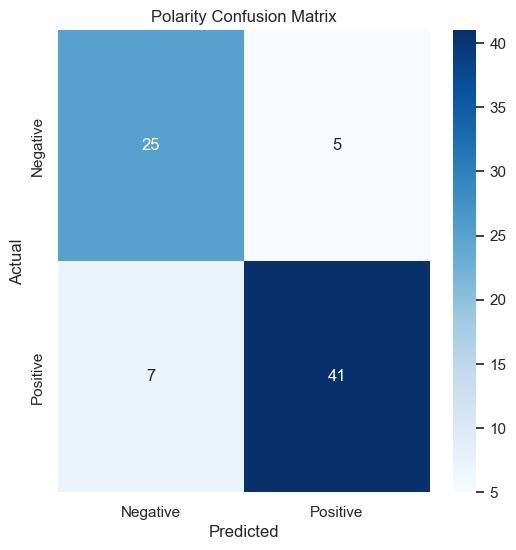

In [256]:
# Create confusion matrix
cm = confusion_matrix(y_manual, y_pol)

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Polarity Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [257]:
# Calculate Accuracy, Precision, Recall and F1 Score
from sklearn.metrics import classification_report
print(classification_report(y_manual, y_pol))

              precision    recall  f1-score   support

          -1       0.78      0.83      0.81        30
           1       0.89      0.85      0.87        48

    accuracy                           0.85        78
   macro avg       0.84      0.84      0.84        78
weighted avg       0.85      0.85      0.85        78



In [258]:
# Sentiment Score: Create confusion matrix
# Change the sentiment score to be in-line with manual_rating (i.e. 1,0,-1)
y_manual = confusion_df['manual_rating']
y_ss = confusion_df['review_sentiment'].apply(lambda x:1 if x > 0 else (-1 if x < 0 else 0))

y_manual, y_ss

(7        1
 44       1
 55       1
 117     -1
 165      1
         ..
 1728    -1
 1797     1
 1804    -1
 1810     1
 1829    -1
 Name: manual_rating, Length: 78, dtype: object,
 7       1
 44      1
 55      1
 117     1
 165     1
        ..
 1728   -1
 1797   -1
 1804   -1
 1810    1
 1829    0
 Name: review_sentiment, Length: 78, dtype: int64)

In [259]:
# Convert 'manual_rating' to integer
y_manual = pd.to_numeric(confusion_df['manual_rating'], errors='coerce')

In [260]:
y_manual, y_ss

(7       1
 44      1
 55      1
 117    -1
 165     1
        ..
 1728   -1
 1797    1
 1804   -1
 1810    1
 1829   -1
 Name: manual_rating, Length: 78, dtype: int64,
 7       1
 44      1
 55      1
 117     1
 165     1
        ..
 1728   -1
 1797   -1
 1804   -1
 1810    1
 1829    0
 Name: review_sentiment, Length: 78, dtype: int64)

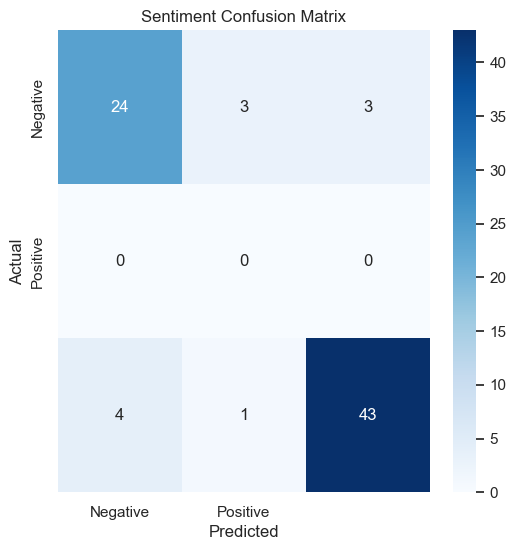

In [261]:
# Create confusion matrix
cm = confusion_matrix(y_manual, y_ss)

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Sentiment Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [262]:
# Calculate Accuracy, Precision, Recall and F1 Score
from sklearn.metrics import classification_report
print(classification_report(y_manual, y_ss))

              precision    recall  f1-score   support

          -1       0.86      0.80      0.83        30
           0       0.00      0.00      0.00         0
           1       0.93      0.90      0.91        48

    accuracy                           0.86        78
   macro avg       0.60      0.57      0.58        78
weighted avg       0.90      0.86      0.88        78



#### From the Classification Report, we can see that both TextBlob and Vadar work well with overall accuracy at 85% adn 86% respectively. However, Vadar appears to be very positive skewed which is shown in the classification report, as there is a large difference in the precision score for positive and negative (positive: 91% precision, negative: 83% precision). TextBlob is more balanced in how it handles positive and negatives (positive: 87%, negative: 81%), even though its less precise overall. With this in mind, I will choose TextBlob to be the main tool for judging sentiment in reviews. 

In [264]:
# Top 20 positive reviews.
top_20_positive = trc_new.nlargest(20, 'review_sentiment')[['review', 'review_sentiment']]

# View output.
top_20_positive

review  \
1121                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      disclaimer  bought this from a local store  paid list value  but supporting local game stores helps keep them in business  and it s a rough market to keep a gaming store running  also  i do not own  nor have i played nbsp  a data hook  product link linked  class  a link normal  href   dungeons dragons castle ravenloft board game dp 0786955570 ref cm cr arp d rvw txt ie utf8  dungeons   dragons  castle ravenloft board game  a   the first d d adventures board game  regardless   \n\ndungeons   dragons  wrath of ashardalon board game  woa  is a fantastic value at  65  list   you get 42  plastic  unpainted  minis  1  scale   you get a nice set of cardboard interlocking    dungeon tiles  and you get a fun  very random  board game playable either by yourself or with up to 4 friends \n\nwhat it is \nwoa is  in gamer terms  a roguelike in tabletop form  in layman s terms  woa is a dungeon crawler  you start at the entrance  and have a specific goal  rescue the villagers  survive the dungeon  destroy the altar  slay the dragon   the adventures are built randomly based on shuffling the tiles  and they are played individually as you explore  you can go for a massive linear dungeon based on a little luck and careful planning  or you can attempt to condense yourself in a larger swarm interconnected tunnels \n\nsome of the adventures feature  chambers   special larger rooms that are all placed at once and filled with enemies and a specific goal that the team must complete to win the adventure \n\nit s a great way to introduce someone into tabletop roleplaying gaming  it s the perfect medium between a board game and an actual pen and paper rpg \n\nit s a fun  quick  game to run a quick adventure for some friends taking anywhere between 20 minutes and an hour per adventure \n\nwhat it isn t \na deeper role

In [265]:
# Export original dataframe to CSV with all sentiment and polarity scores
trc3.to_csv('tr_clean_clusters_scores.csv', index = False)

In [266]:
# Include the products in the top 20 and bottom 20
top_20_pos_prod = trc3.nsmallest(20,'review_polarity')[['review_polarity', 'product', 'loyalty_points']]

# View output
top_20_pos_prod

review_polarity  product  loyalty_points
208         -1.000000     1459              31
182         -0.975000     6504             881
989         -0.625000     4047            5019
1804        -0.583333     2253             663
364         -0.550000    11056            1344
117         -0.500000     2387            2332
227         -0.500000      231             969
230         -0.500000     2173              69
290         -0.500000     6694            1658
301         -0.500000     3525            1809
803         -0.500000     1473             562
1524        -0.500000     7533             522
1829        -0.500000     3967             410
174         -0.491667     5758             696
347         -0.452500     7384            3111
538         -0.440741    10281             266
306         -0.439583     3165            1668
427         -0.400000      231             969
437         -0.400000      195            1314
497         -0.400000     3436            1503

In [267]:
# Group data by product and check mean polarity score
product_polarity =  trc3.groupby('product')[['review_polarity', 'summary_polarity']].mean()

product_polarity_sorted = product_polarity.sort_values(by='review_polarity')

product_polarity_sorted

review_polarity  summary_polarity
product                                   
6431            0.001382          0.138741
3436            0.011848          0.110833
9597            0.035130          0.156500
4399            0.036642          0.235667
2795            0.047544          0.305167
...                  ...               ...
4619            0.404173          0.120750
3158            0.409383          0.268333
11004           0.411568          0.373333
9080            0.444396          0.148333
9119            0.485984          0.135833

[200 rows x 2 columns]

## 7. Discuss: Insights and observations

***Your observations here...***

#### 
- Overall, reviews and summary skew positive. Review sentiment skews positive, with an average rating of +0.23
- Top performing products in terms of review sentiment are product 9119, 9080 and 11004
- Bottom performing products in terms of review sentiment are 6431, 3436 and 9597
- From the Classification Report, we can see that both TextBlob and Vadar work well with overall accuracy at 85% adn 86% respectively. However, Vadar appears to be very positive skewed which is shown in the classification report, as there is a large difference in the precision score for positive and negative (positive: 91% precision, negative: 83% precision). TextBlob is more balanced in how it handles positive and negatives (positive: 87%, negative: 81%), even though its less precise overall. With this in mind, I will choose TextBlob to be the main tool for judging sentiment in reviews. 

# 